Had same issue, pg_ctl: server does not shut down. Furthermore, ps auxwww | grep postgres showed no postgres running, while pg_ctl -D /usr/local/var/postgres status showed that postgres is running. Restarting my mac didn't help, i even went as far as to reset SMC, but this SO Q/A gave me an idea what to look for next: brew issues.

Following this line of thought, i found this helpful blog post, that came down to following commands that solved this issue for me:
```
$ brew services list
$ brew services restart postgresql
```

## Data Engineering: A brief history

Knowing a bit of the history of data engineering will help you understand how certain tools were developed, and give you more context when choosing between tools and frameworks. There are two readings we suggest.

1) [On the Evolution of Data Engineering](https://medium.com/analytics-and-data/on-the-evolution-of-data-engineering-c5e56d273e37): This short read (~5 minutes) focuses on the recent change from managing SQL databases to working with massive datasets in real time. It was written by Julien Kervizic, an experienced analytics expert from the Netherlands.

2) [Data Engineering Introduction and Epochs](https://learn.panoply.io/hubfs/Data%20Engineering%20-%20Introduction%20and%20Epochs.pdf): This slightly longer read (~20 minutes) goes further back in time to the birth of computers. It walks through four "epochs" of data engineering, and the major advances over the past 70 years. It was written by Panopoly, a data engineering platform provider.


Data Engineering Tools
Feel free to look at these resources and infographic describing the different tools used by Data Engineers.

- https://www.burtchworks.com/2018/09/10/the-rise-of-data-engineering-common-skills-and-tools/
- https://www.analyticsindiamag.com/data-engineering-101-top-tools-and-framework-resources/
- https://joviam.com/this-infographic-of-big-data-tools-will-blow-your-mind-infographic/
- https://datafloq.com/big-data-open-source-tools/os-home/

# Data Model

Databases: A database is a structured repository or collection of data that is stored and retrieved electronically for use in applications. Data can be stored, updated, or deleted from a database.

Database Management System (DBMS): The software used to access the database by the user and application is the database management system. Check out these few links describing a DBMS in more detail.

- [Introduction to DBMS](https://www.geeksforgeeks.org/introduction-of-dbms-database-management-system-set-1/)
- [DBMS as per Wikipedia](https://en.wikipedia.org/wiki/Database#Database_management_system)

## What is Data Model?
Data modeling at a high level is all about an abstraction that organizes elements of data and how they relate to each other.

### Process
To organize data into a database system to ensure your data is persisted and easily usable.

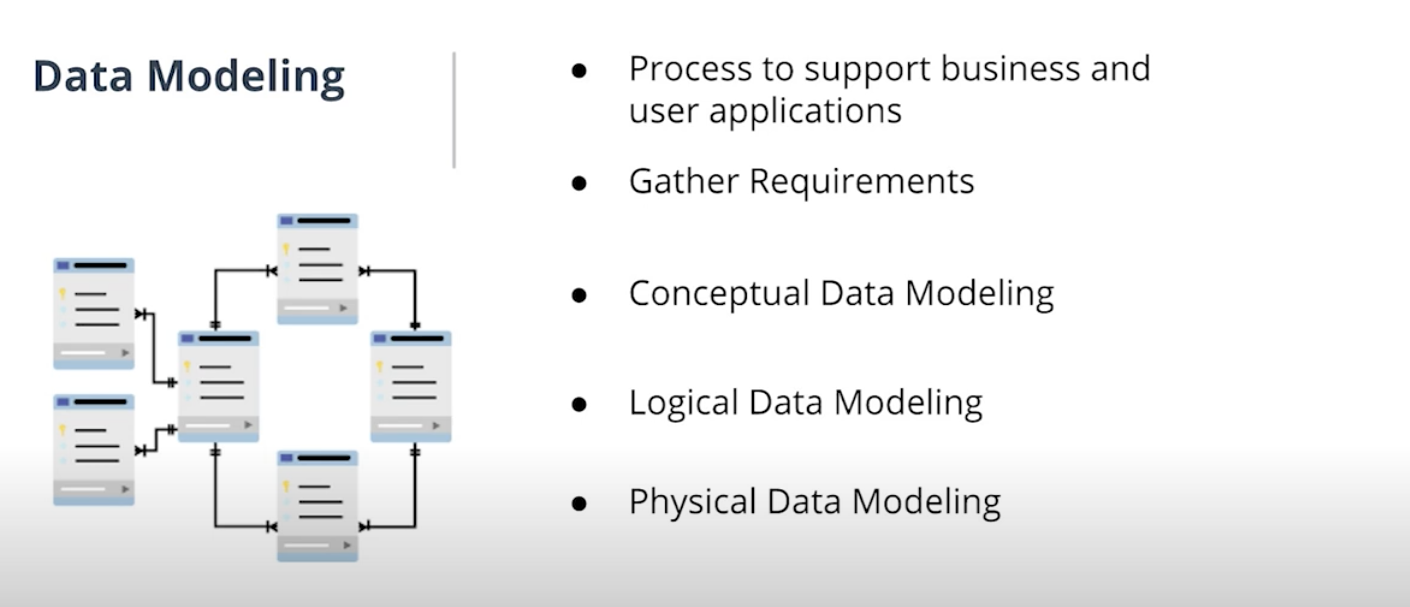
Entity mapping diagram

Physical data modeling is to transform logical data model to database use DDL(data definition language)

### Common Questions
#### Why can't everything be stored in a giant Excel spreadsheet?

- There are limitations to the amount of data that can be stored in an Excel sheet. So, a database helps organize the elements into tables - rows and columns, etc. Also reading and writing operations on a large scale is not possible with an Excel sheet, so it's better to use a database to handle most business functions.
#### Does data modeling happen before you create a database, or is it an iterative process?

- It's definitely an iterative process. Data engineers continually reorganize, restructure, and optimize data models to fit the needs of the organization.
#### How is data modeling different from machine learning modeling?

- Machine learning includes a lot of data wrangling to create the inputs for machine learning models, but data modeling is more about how to structure data to be used by different people within an organization. You can think of data modeling as the process of designing data and making it available to machine learning engineers, data scientists, business analytics, etc., so they can make use of it easily.



## Why data modeling is important?

1. Key points about Data Modeling

    - Data Organization: The organization of the data for your applications is extremely important and makes everyone's life easier.
    - Use cases: Having a well thought out and organized data model is critical to how that data can later be used. Queries that could have been straightforward and simple might become complicated queries if data modeling isn't well thought out.
    - Starting early: Thinking and planning ahead will help you be successful. This is not something you want to leave until the last minute.
    - Iterative Process: Data modeling is not a fixed process. It is iterative as new requirements and data are introduced. Having flexibility will help as new information becomes available.

2. Example of Why Data Modeling is Important:

Let's take an example from Udacity. Here, a Udacity data engineer would help structure the data so it can be used by different people within Udacity for further analysis and also shared with the learner on the website. For instance, when we want to track the students' progress within a Nanodegree program, we want to aggregate data across students and projects within a Nanodegree. In a relational database, this requires the data to be structured in ways that each student's data is tracked across all Nanodegree programs that s/he has ever enrolled in. The data also needs to track the student's progress within each of those Nanodegree programs.

The data model is critical for accurately representing each data object. For instance, a data table would track a student's progress on project submissions, i.e., whether they passed or failed a specific rubric requirement. Furthermore, the data model should ensure that a student's progress is updated and aggregated to provide an indicator of whether the student passed all the rubric requirements and successfully finished the project. Data modeling is critical to track all of these pieces of data so the tables are speaking to each other, updating the tables correctly (e.g., updating a student's progress on a project submission), and meeting defined rules (e.g., project completed when all rubric requirements are passed).

## Relational and NoSQL Databases

They do data modeling different

### Relational Model:
This model prganizes data into one or more tables(or relations) of columns and rows, with a unique key dentififying each row. Generally, each table represent one entity type(Such as customer or product)

A software system used to maintain relational databases is a relational database management system (RDBMS)

SQL(Structured Query Language) is the language used across almost all relational database system for querying and maintaining the databas

### The basics
- Database/Schema is collection of tables

- Tables/Relations are a group of rows sharing the same labeled elements, such as a custom table

- Columns/Attributes are labelde element such as name, email, city

- Rows/Tuples are sigle items, such as a individual's records


### Advantages of Using a Relational Database
- **Flexibility for writing in SQL queries:** With SQL being the most common database query language.
- **Modeling the data not modeling queries**
- **Ability to do JOINS**
- **Ability to do aggregations and analytics**
- **Secondary Indexes available** : You have the advantage of being able to add another index to help with quick searching.
- **Smaller data volumes:** If you have a smaller data volume (and not big data) you can use a relational database for its simplicity.
- **ACID Transactions:** Allows you to meet a set of properties of database transactions intended to guarantee validity even in the event of errors, power failures, and thus maintain data integrity.
- **Easier to change to business requirements


### ACID Transactions
Properties of database transactions intended to guarantee validity even in the event of errors or power failures.

- Atomicity: The whole transaction is processed or nothing is processed. A commonly cited example of an atomic transaction is money transactions between two bank accounts. The transaction of transferring money from one account to the other is made up of two operations. First, you have to withdraw money in one account, and second you have to save the withdrawn money to the second account. An atomic transaction, i.e., when either all operations occur or nothing occurs, keeps the database in a consistent state. This ensures that if either of those two operations (withdrawing money from the 1st account or saving the money to the 2nd account) fail, the money is neither lost nor created. Source [Wikipedia](https://en.wikipedia.org/wiki/Atomicity_%28database_systems%29) for a detailed description of this example. 

- Consistency: Only transactions that abide by constraints and rules are written into the database, otherwise the database keeps the previous state. The data should be correct across all rows and tables. Check out additional information about consistency on [Wikipedia](https://en.wikipedia.org/wiki/Consistency_%28database_systems%29).

- Isolation: Transactions are processed independently and securely, order does not matter. A low level of isolation enables many users to access the data simultaneously, however this also increases the possibilities of concurrency effects (e.g., dirty reads or lost updates). On the other hand, a high level of isolation reduces these chances of concurrency effects, but also uses more system resources and transactions blocking each other. Source: [Wikipedia](https://en.wikipedia.org/wiki/Isolation_%28database_systems%29)
When a user make a transaction, other users will be bolcked.

- Durability: Completed transactions are saved to database even in cases of system failure. A commonly cited example includes tracking flight seat bookings. So once the flight booking records a confirmed seat booking, the seat remains booked even if a system failure occurs. Source: [Wikipedia](https://en.wikipedia.org/wiki/ACID).

## When Not to Use a Relational Database
- **Have large amounts of data:** Relational Databases are not distributed databases and because of this they can only scale vertically by adding more storage in the machine itself. You are limited by how much you can scale and how much data you can store on one machine. You cannot add more machines like you can in NoSQL databases.
- **Need to be able to store different data type formats:** Relational databases are not designed to handle unstructured data.
- **Need high throughput -- fast reads:** While ACID transactions bring benefits, they also slow down the process of reading and writing data. If you need very fast reads and writes, using a relational database may not suit your needs.
- **Need a flexible schema:** Flexible schema can allow for columns to be added that do not have to be used by every row, saving disk space.
- **Need high availability:** The fact that relational databases are not distributed (and even when they are, they have a coordinator/worker architecture), they have a single point of failure. When that database goes down, a fail-over to a backup system occurs and takes time.
- **Need horizontal scalability:** Horizontal scalability is the ability to add more machines or nodes to a system to increase performance and space for data.

## PostgreSQL

- open source object-relational database system
- Uses and builds on SQL language



The following information on setting up PostgreSQL on your local machine is completely optional for this course and for users who feel comfortable setting up the environment on their local machine to complete the exercises.

Here is additional Information on how to install and set up Postgres locally in case you want to follow along the demo on your local machine. This [link](https://www.codementor.io/@engineerapart/getting-started-with-postgresql-on-mac-osx-are8jcopb) provides directions for MacOS. It goes through configuring Postgres, creating users, and creating databases using the psql utility. It will help further explain the Python driver and also help you in running the demos locally.

In addition, here is a short tutorial on psycopg2. This [link](https://pynative.com/python-postgresql-tutorial/) gives a good starter tutorial in case you are curious about it.
Here are the two demo files. Feel free to follow along. Just download these and open up the Jupyter Notebook files.

Let’s go ahead and start Postgres running, and make sure Postgres starts every time your computer starts up. Execute the following command:

```shell
$ pg_ctl -D /usr/local/var/postgres start && brew services start postgresql
```

if there is any error, and can not shutdown the server, we can use
```shell
$ brew services list
$ brew services restart postgresql
```

Start by entering the following on the command line:
```shell
$ psql postgres
```

Then we can create user

### Walk through the basics of PostgreSQL. You will need to complete the following tasks:<li> Create a table in PostgreSQL, <li> Insert rows of data <li> Run a simple SQL query to validate the information. <br>
    
#### Import the library 
*Note:* An error might popup after this command has executed. If it does, read it carefully before ignoring. 

In [24]:
import psycopg2

### Create a connection to the database

In [25]:
try: 
    conn = psycopg2.connect("host=localhost dbname=studentdb user=edifierxuhao password=****")
except psycopg2.Error as e: 
    print("Error: Could not make connection to the Postgres database")
    print(e)

### Use the connection to get a cursor that can be used to execute queries.

In [26]:
try: 
    cur = conn.cursor()
except psycopg2.Error as e: 
    print("Error: Could not get curser to the Database")
    print(e)

### TO-DO: Set automatic commit to be true so that each action is committed without having to call conn.commit() after each command. 

In [27]:
conn.set_session(autocommit = True)

### TO-DO: Create a database to do the work in. 

In [28]:
## TO-DO: Add the database name within the CREATE DATABASE statement. You can choose your own db name.
try: 
    cur.execute("create database mydb")
except psycopg2.Error as e:
    print(e)

database "mydb" already exists



#### TO-DO: Add the database name in the connect statement. Let's close our connection to the default database, reconnect to the Udacity database, and get a new cursor.

In [29]:
## TO-DO: Add the database name within the connect statement
try: 
    conn.close()
except psycopg2.Error as e:
    print(e)
    
try: 
    conn = psycopg2.connect("host=localhost dbname=mydb user=edifierxuhao password=****")
except psycopg2.Error as e: 
    print("Error: Could not make connection to the Postgres database")
    print(e)
    
try: 
    cur = conn.cursor()
except psycopg2.Error as e: 
    print("Error: Could not get curser to the Database")
    print(e)

conn.set_session(autocommit=True)

### Create a Song Library that contains a list of songs, including the song name, artist name, year, album it was from, and if it was a single. 

`song_title
artist_name
year
album_name
single`



In [30]:
## TO-DO: Finish writing the CREATE TABLE statement with the correct arguments
try: 
    cur.execute("CREATE TABLE IF NOT EXISTS music_library (song_title varchar, artist_name varchar, year int, album_name varchar, single boolean);")
except psycopg2.Error as e: 
    print("Error: Issue creating table")
    print (e)

### TO-DO: Insert the following two rows in the table
`First Row:  "Across The Universe", "The Beatles", "1970", "False", "Let It Be"`

`Second Row: "The Beatles", "Think For Yourself", "False", "1965", "Rubber Soul"`

In [31]:
## TO-DO: Finish the INSERT INTO statement with the correct arguments

try: 
    cur.execute("INSERT INTO music_library (song_title,artist_name, year, album_name, single) \
                 VALUES (%s, %s, %s, %s, %s)", \
                 ("Across The Universe", "The Beatles", 1970,"Let It Be",False))
except psycopg2.Error as e: 
    print("Error: Inserting Rows")
    print (e)
    
try: 
    cur.execute("INSERT INTO music_library (song_title,artist_name, year, album_name, single) \
                  VALUES (%s, %s, %s, %s, %s)",
                  ("Think For Yourself", "The Beatles",1965,"Rubber Soul",False))
except psycopg2.Error as e: 
    print("Error: Inserting Rows")
    print (e)

### TO-DO: Validate your data was inserted into the table. 

In [32]:
## TO-DO: Finish the SELECT * Statement 
try: 
    cur.execute("SELECT * FROM music_library;")
except psycopg2.Error as e: 
    print("Error: select *")
    print (e)

row = cur.fetchone()
while row:
    print(row)
    row = cur.fetchone()

('Across The Universe', 'The Beatles', 1970, 'Let It Be', False)
('Think For Yourself', 'The Beatles', 1965, 'Rubber Soul', False)
('Across The Universe', 'The Beatles', 1970, 'Let It Be', False)
('Think For Yourself', 'The Beatles', 1965, 'Rubber Soul', False)


### And finally close your cursor and connection. 

In [33]:
cur.close()
conn.close()

## NoSQL Databases

has a simpler design, simpler hprizontal scaling and finer control of availability. Data structures used are different than those in Relational Database are make some operations faster.

NoSQL = Not Only SQL; NoSQL and NonRelational are interchangeable terms.

Common Types of NoSQL Databases
- Apache Cassandra (Partition Row store)
- MongoDB (Document Store)
- DynamoDB (key-value store)
- Apache HBase (Wide Column Store)
- Neo4j (Graph Database)

We will use Apache Cassandra to explain the concepts of data modeling for NoSQL Databases

### The basic of Apache Cassandra
- Keyspace is conllection of tables
- Table is a group of Partitions
- Row is a single item

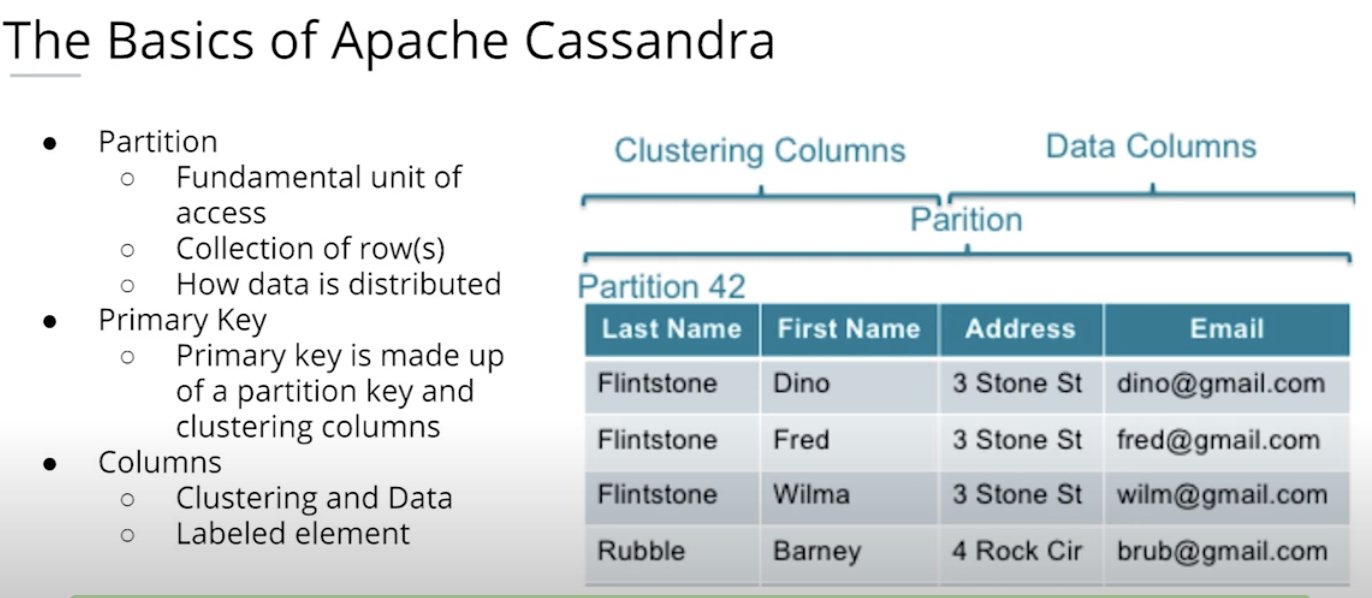

### Common Questions:
#### What type of companies use Apache Cassandra?
All kinds of companies. For example, Uber uses Apache Cassandra for their entire backend. Netflix uses Apache Cassandra to serve all their videos to customers. Good use cases for NoSQL (and more specifically Apache Cassandra) are :

1. Transaction logging (retail, health care)
2. Internet of Things (IoT)
3. Time series data
4. Any workload that is heavy on writes to the database (since Apache Cassandra is optimized for writes).

#### Would Apache Cassandra be a hindrance for my analytics work? If yes, why?
Yes, if you are trying to do analysis, such as using GROUP BY statements. Since Apache Cassandra requires data modeling based on the query you want, you can't do ad-hoc queries. However you can add clustering columns into your data model and create new tables.

## When to use a NoSQL Database
- Need to be able to store different data type formats: NoSQL was also created to handle different data configurations: structured, semi-structured, and unstructured data. JSON, XML documents can all be handled easily with NoSQL.
- Large amounts of data: Relational Databases are not distributed databases and because of this they can only scale vertically by adding more storage in the machine itself. NoSQL databases were created to be able to be horizontally scalable. The more servers/systems you add to the database the more data that can be hosted with high availability and low latency (fast reads and writes).
- Need horizontal scalability: Horizontal scalability is the ability to add more machines or nodes to a system to increase performance and space for data
- Need high throughput: While ACID transactions bring benefits they also slow down the process of reading and writing data. If you need very fast reads and writes using a relational database may not suit your needs.
- Need a flexible schema: Flexible schema can allow for columns to be added that do not have to be used by every row, saving disk space.
- Need high availability: Relational databases have a single point of failure. When that database goes down, a failover to a backup system must happen and takes time.

## When NOT to use a NoSQL Database?
- **When you have a small dataset:** NoSQL databases were made for big datasets not small datasets and while it works it wasn’t created for that.
- **When you need ACID Transactions:** If you need a consistent database with ACID transactions, then most NoSQL databases will not be able to serve this need. NoSQL database are eventually consistent and do not provide ACID transactions. However, there are exceptions to it. Some non-relational databases like MongoDB can support ACID transactions.
- **When you need the ability to do JOINS across tables:** NoSQL does not allow the ability to do JOINS. This is not allowed as this will result in full table scans.
- **If you want to be able to do aggregations and analytics**
- **If you have changing business requirements :** Ad-hoc queries are possible but difficult as the data model was done to fix particular queries
- **If your queries are not available and you need the flexibility :** You need your queries in advance. If those are not available or you will need to be able to have flexibility on how you query your data you might need to stick with a relational database


### Caveats to NoSQL and ACID Transactions
There are some NoSQL databases that offer some form of ACID transaction. As of v4.0, MongoDB added multi-document ACID transactions within a single replica set. With their later version, v4.2, they have added multi-document ACID transactions in a sharded/partitioned deployment.

- Check out this documentation from MongoDB on [multi-document ACID transactions](https://www.mongodb.com/collateral/mongodb-multi-document-acid-transactions)
- Here is another [link documenting MongoDB's ability to handle ACID transactions](https://www.mongodb.com/blog/post/mongodb-multi-document-acid-transactions-general-availability)

Another example of a NoSQL database supporting ACID transactions is MarkLogic. 

- Check out this [link](https://www.marklogic.com/blog/how-marklogic-supports-acid-transactions/) from their blog that offers ACID transactions.

The following information on setting up Cassandra on your local machine is completely optional for this course and for users who feel comfortable setting up the environment on their local machine to complete the exercises. Please note, Apache Cassandra is easier to install on MacOS than a Windows machine.

Installing Apache Cassandra to run locally on your machine:
[Cassandra Documentation](https://cassandra.apache.org/doc/latest/getting_started/installing.html)

Again, if you want to follow along, here is the demo notebook showcased in the video above.


```shell
$ pip install cassandra-driver
```

Start Cassandra:
```shell
$ cd xuhao3/apache-cassandra-4.0.0/
$ bin/cassandra
```

In [34]:
import cassandra

Then, let's create a connection to the database

In [35]:
from cassandra.cluster import Cluster

try:
    cluster = Cluster(['localhost'])
    session = cluster.connect()
except Exception as e:
    print(e)

('Unable to connect to any servers', {'::1:9042': ConnectionRefusedError(61, "Tried connecting to [('::1', 9042, 0, 0)]. Last error: Connection refused"), '127.0.0.1:9042': ConnectionRefusedError(61, "Tried connecting to [('127.0.0.1', 9042)]. Last error: Connection refused")})


### Let's Test our Connection

In [43]:
try:
    session. execute('''select * from music_libary''')
except Exception as e:
    print(e)

Error from server: code=2200 [Invalid query] message="No keyspace has been specified. USE a keyspace, or explicitly specify keyspace.tablename"


### Create a key space

In [46]:
try:
    session.execute('''
    CREATE KEYSPACE IF NOT EXISTS udacity
    WITH REPLICATION = 
    {'class':'SimpleStrategy','replication_factor':1}'''
                   )
except Exception as e:
    print(e)

### connect to our keyspace

compare to PostgreSQL, we do not need to connect again

In [47]:
try:
    session.set_keyspace('udacity')
except Exception as e:
    print(e)

We are working with Apache Cassandra a NoSQL database, we can't model our data and create our table without more information.

### We are working with Apache Cassandra a NoSQL database. We can't model our data and create our table without more information.

### Think about what queries will you be performing on this data?

#### We want to be able to get every album that was released in a particular year. 
`select * from music_library WHERE YEAR=1970`

*To do that:* 
We need to be able to do a WHERE on YEAR. 

YEAR will become my partition key,artist name will be my clustering column to make each Primary Key unique. **Remember there are no duplicates in Apache Cassandra.**,

- **Table Name:** music_library
- **column 1:** Album Name,
- **column 2:** Artist Name,
- **column 3:** Year,
- PRIMARY KEY(year, artist name)

### Now to translate this information into a Create Table Statement. \n",
More information on Data Types can be found [here](https://datastax.github.io/python-driver)


In [48]:
query = 'CREATE TABLE IF NOT EXISTS music_library'
query = query + '(year int, artist_name text, album_name text, PRIMARY KEY(year, artist_name))'
try:
    session.execute(query)
except Exception as e:
    print(e)


In [51]:
query = 'select count(*) from music_library'
try:
    count = session.execute(query)
except Exception as e:
    print(e)
    
print(count.one())

Row(count=0)


Let's insert two rows

In [53]:
query = 'INSERT INTO music_library (year, artist_name, album_name)'
query = query + 'VALUES (%s, %s, %s)'

try:
    session.execute(query,(1970, 'The Beatles', 'Let it Be'))
except Exception as e:
    print(e)
    
try:
    session.execute(query, (1965, 'The Beatles', 'Rubber Soul'))
except Exception as e:
    print(e)

In [54]:
query = 'select * from music_library'
try:
    rows = session.execute(query)
except Exception as e:
    print(e)

for row in rows:
    print(row.year, row.album_name, row.artist_name)

1965 Rubber Soul The Beatles
1970 Let it Be The Beatles


Apache Cassandra never allow duplicates, I can run INSERT VALUES many times, I can only get one record.

In [55]:
query = 'select * from music_library WHERE year = 1970'
try:
    rows = session.execute(query)
except Exception as e:
    print(e)

for row in rows:
    print(row.year, row.album_name, row.artist_name)

1970 Let it Be The Beatles


In [57]:
# For the sake of the demo, I will drop the table
query = 'DROP TABLE music_library'

try:
    rows = session.execute(query)
except Exception as e:
    print(e)

In [58]:
session.shutdown()
cluster.shutdown()

### Walk through the basics of Apache Cassandra. Complete the following tasks:<li> Create a table in Apache Cassandra, <li> Insert rows of data,<li> Run a simple SQL query to validate the information. <br>

#### Import Apache Cassandra python package

In [59]:
import cassandra

### Create a connection to the database

In [60]:
from cassandra.cluster import Cluster
try: 
    cluster = Cluster(['localhost']) #If you have a locally installed Apache Cassandra instance
    session = cluster.connect()
except Exception as e:
    print(e)
 

### TO-DO: Create a keyspace to do the work in 

In [63]:
## TO-DO: Create the keyspace
try:
    session.execute("""
    CREATE KEYSPACE IF NOT EXISTS udacity 
    WITH REPLICATION = 
    { 'class' : 'SimpleStrategy', 'replication_factor' : 1 }"""
)

except Exception as e:
    print(e)

### TO-DO: Connect to the Keyspace

In [64]:
## To-Do: Add in the keyspace you created
try:
    session.set_keyspace('udacity')
except Exception as e:
    print(e)

### Create a Song Library that contains a list of songs, including the song name, artist name, year, album it was from, and if it was a single. 

`song_title
artist_name
year
album_name
single`

### TO-DO: You need to create a table to be able to run the following query: 
`select * from songs WHERE year=1970 AND artist_name="The Beatles"`

In [65]:
## TO-DO: Complete the query below
query = "CREATE TABLE IF NOT EXISTS music_library "
query = query + '(song_title text, artist_name text, year int, album_name text, single Boolean, PRIMARY KEY(year, artist_name))'

try:
    session.execute(query)
except Exception as e:
    print(e)



### TO-DO: Insert the following two rows in your table
`First Row:  "Across The Universe", "The Beatles", "1970", "False", "Let It Be"`

`Second Row: "The Beatles", "Think For Yourself", "False", "1965", "Rubber Soul"`

In [67]:
## Add in query and then run the insert statement
query = "INSERT INTO music_library (song_title, artist_name, year, album_name, single)" 
query = query + " VALUES (%s, %s, %s, %s, %s)"

try:
    session.execute(query, ("Across The Universe","The Beatles", 1970,"Let It Be",False))
except Exception as e:
    print(e)
    
try:
    session.execute(query, ("Think For Yourself","The Beatles", 1965,"Rubber Soul",False))
except Exception as e:
    print(e)

### TO-DO: Validate your data was inserted into the table.

In [68]:
## TO-DO: Complete and then run the select statement to validate the data was inserted into the table
query = 'SELECT * FROM music_library'
try:
    rows = session.execute(query)
except Exception as e:
    print(e)
    
for row in rows:
    print (row.year, row.album_name, row.artist_name)

1965 Rubber Soul The Beatles
1970 Let It Be The Beatles


### TO-DO: Validate the Data Model with the original query.

`select * from songs WHERE YEAR=1970 AND artist_name="The Beatles"`

In [74]:
##TO-DO: Complete the select statement to run the query 
query = "SELECT * FROM music_library WHERE year=1970 AND artist_name = 'The Beatles'"
try:
    rows = session.execute(query)
except Exception as e:
    print(e)
    
for row in rows:
    print (row.year, row.album_name, row.artist_name)

1970 Let It Be The Beatles


### And Finally close the session and cluster connection

In [75]:
session.shutdown()
cluster.shutdown()

# Relational Data Models

Stuendts will learn the fundamentals of how to do relational data modeling by focusing on normalization, denormalization, fact/dimension tables, and different schema models.

## Databases
### Rule 1: The information rule:
All information in a relational database is represented explicitly at the logical level and in exactly one way – by values in tables.

More information on Codd's 12 Rules can be found here:
[Wikipedia link](https://en.wikipedia.org/wiki/Codd%27s_12_rules)

- Rule 0: The foundation rule:

    For any system that is advertised as, or claimed to be, a relational data base management system, that system must be able to manage data bases entirely through its relational capabilities.
- Rule 1: The information rule:

    All information in a relational data base is represented explicitly at the logical level and in exactly one way – by values in tables.
- Rule 2: The guaranteed access rule:

    Each and every datum (atomic value) in a relational data base is guaranteed to be logically accessible by resorting to a combination of table name, primary key value and column name.
- Rule 3: Systematic treatment of null values:

    Null values (distinct from the empty character string or a string of blank characters and distinct from zero or any other number) are supported in fully relational DBMS for representing missing information and inapplicable information in a systematic way, independent of data type.
- Rule 4: Dynamic online catalog based on the relational model:

    The data base description is represented at the logical level in the same way as ordinary data, so that authorized users can apply the same relational language to its interrogation as they apply to the regular data.
- Rule 5: The comprehensive data sublanguage rule:

    A relational system may support several languages and various modes of terminal use (for example, the fill-in-the-blanks mode). However, there must be at least one language whose statements are expressible, per some well-defined syntax, as character strings and that is comprehensive in supporting all of the following items:
    - Data definition.
    - View definition.
    - Data manipulation (interactive and by program).
    - Integrity constraints.
    - Authorization.
    - Transaction boundaries (begin, commit and rollback).
- Rule 6: The view updating rule:

    All views that are theoretically updatable are also updatable by the system.
- Rule 7: Possible for high-level insert, update, and delete:

    The capability of handling a base relation or a derived relation as a single operand applies not only to the retrieval of data but also to the insertion, update and deletion of data.
- Rule 8: Physical data independence:

    Application programs and terminal activities remain logically unimpaired whenever any changes are made in either storage representations or access methods.
- Rule 9: Logical data independence:

    Application programs and terminal activities remain logically unimpaired when information-preserving changes of any kind that theoretically permit unimpairment are made to the base tables.
- Rule 10: Integrity independence:

    Integrity constraints specific to a particular relational data base must be definable in the relational data sublanguage and storable in the catalog, not in the application programs.
- Rule 11: Distribution independence:

    The end-user must not be able to see that the data is distributed over various locations. Users should always get the impression that the data is located at one site only.
- Rule 12: The nonsubversion rule:

    If a relational system has a low-level (single-record-at-a-time) language, that low level cannot be used to subvert or bypass the integrity rules and constraints expressed in the higher level relational language (multiple-records-at-a-time).

### Importance of Relational Databases:
- **Standardization of data model:** Once your data is transformed into the rows and columns format, your data is standardized and you can query it with SQL
- **Flexibility in adding and altering tables:** Relational databases gives you flexibility to add tables, alter tables, add and remove data.
- **Data Integrity:** Data Integrity is the backbone of using a relational database.
- **Structured Query Language (SQL):** A standard language can be used to access the data with a predefined language.
- **Simplicity :** Data is systematically stored and modeled in tabular format.
- **Intuitive Organization:** The spreadsheet format is intuitive but intuitive to data modeling in relational databases.

### OLAP vs OLTP
#### Online Analytical Processing (OLAP):
Databases optimized for these workloads allow for complex analytical and ad hoc queries, including aggregations. These type of databases are optimized for reads.

#### Online Transactional Processing (OLTP):
Databases optimized for these workloads allow for less complex queries in large volume. The types of queries for these databases are read, insert, update, and delete.

The key to remember the difference between OLAP and OLTP is analytics (A) vs transactions (T). If you want to get the price of a shoe then you are using OLTP (this has very little or no aggregations). If you want to know the total stock of shoes a particular store sold, then this requires using OLAP (since this will require aggregations).

Additional Resource on the difference between OLTP and OLAP:
This [Stackoverflow post](https://stackoverflow.com/questions/21900185/what-are-oltp-and-olap-what-is-the-difference-between-them) describes it well.

## Normalization: To deduce data redundancy and increase data integrity

reduce repeat of data(reduce redundancy), and make sure the answer I get back from the database is the correct answer(increase integrity)

## Denormalization: Must be done in read heavy workloads to increase performance

## Normal Form:

### Objectives of Normal Form:
1. To free the database from unwanted insertions, updates, & deletion dependencies(if update the data, I only need to update once)
2. To reduce the need for refactoring the database as new types of data are introduced(if want to add a new feature, do not need to redesign the database, but only add a new column or a new table)
3. To make the relational model more informative to users
4. To make the database neutral to the query statistics


### processes
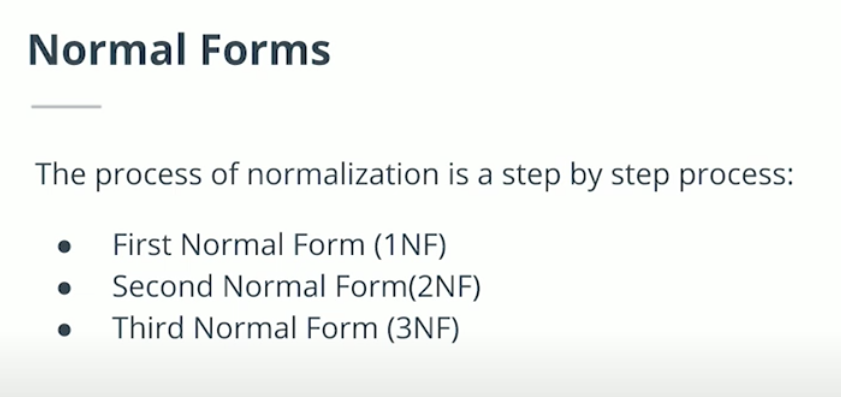

1. How to reach First Normal Form (1NF):

    - Atomic values: each cell contains unique and single values
    - Be able to add data without altering tables
    - Separate different relations into different tables
    - Keep relationships between tables together with foreign keys
2. Second Normal Form (2NF):

    - Have reached 1NF
    - All columns in the table must rely on the Primary Key
3. Third Normal Form (3NF):

    - Must be in 2nd Normal Form
    - No transitive dependencies
    - Remember, transitive dependencies you are trying to maintain is that to get from A-> C, you want to avoid going through B.
    
    **When to use 3NF:**

    - When you want to update data, we want to be able to do in just 1 place. We want to avoid updating the table in the Customers Detail table (in the example in the lecture slide).
    
As a matter of factor, there are 6th normal form, but 4-6 are used in acdamic study.

### Lesson 2 Exercise 1: Creating Normalized Tables

In [7]:
import psycopg2

__Create a connection to the database, get a cursor, and set autocommit to true)__

In [9]:
try: 
    conn = psycopg2.connect("host=localhost dbname=mydb user=edifierxuhao password=****")
except psycopg2.Error as e: 
    print("Error: Could not make connection to the Postgres database")
    print(e)
try: 
    cur = conn.cursor()
except psycopg2.Error as e: 
    print("Error: Could not get cursor to the Database")
    print(e)
conn.set_session(autocommit=True)

Error: Could not make connection to the Postgres database
could not connect to server: Connection refused
	Is the server running on host "localhost" (::1) and accepting
	TCP/IP connections on port 5432?
could not connect to server: Connection refused
	Is the server running on host "localhost" (127.0.0.1) and accepting
	TCP/IP connections on port 5432?



NameError: name 'conn' is not defined

#### Let's imagine we have a table called Music Store. 

`Table Name: music_store
column 0: Transaction Id
column 1: Customer Name
column 2: Cashier Name
column 3: Year 
column 4: Albums Purchased`


## Now to translate this information into a CREATE Table Statement and insert the data

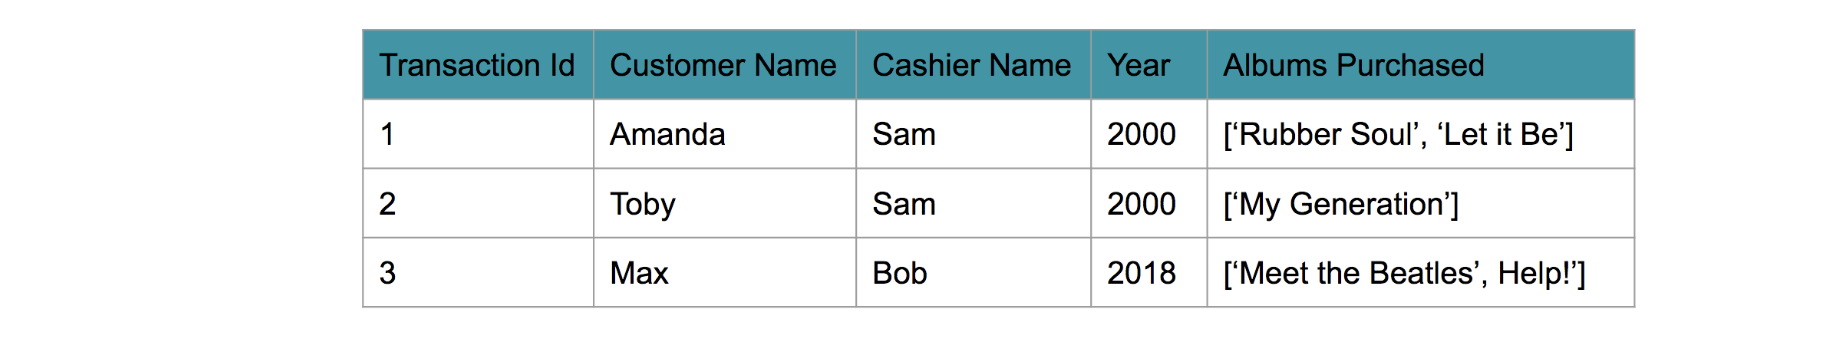

In [3]:
try: 
    cur.execute("CREATE TABLE IF NOT EXISTS music_store (Transaction_Id int,\
                                                         Customer_Name VARCHAR,\
                                                         Cashier_Name VARCHAR,\
                                                         year int,\
                                                         Albums_Purchased text[])")
except psycopg2.Error as e: 
    print("Error: Issue creating table")
    print (e)
    
try: 
    cur.execute("INSERT INTO music_store (Transaction_Id,Customer_Name,Cashier_Name,year,Albums_Purchased) \
                 VALUES (%s, %s, %s, %s, %s)", \
                 (1,'Amanda','Sam',2000,['Rubber Soul','Let it Be']))
except psycopg2.Error as e: 
    print("Error: Inserting Rows")
    print (e)
    
try: 
    cur.execute("INSERT INTO music_store (Transaction_Id,Customer_Name,Cashier_Name,year,Albums_Purchased) \
                 VALUES (%s, %s, %s, %s, %s)", \
                 (2,'Toby','Sam',2000,['My Generation']))
except psycopg2.Error as e: 
    print("Error: Inserting Rows")
    print (e)
    
try: 
    cur.execute("INSERT INTO music_store (Transaction_Id,Customer_Name,Cashier_Name,year,Albums_Purchased) \
                 VALUES (%s, %s, %s, %s, %s)", \
                 (3,'Max','Bob',2018,['Meet the Beatles','Help!']))
except psycopg2.Error as e: 
    print("Error: Inserting Rows")
    print (e)
    
    
try: 
    cur.execute("SELECT * FROM music_store;")
except psycopg2.Error as e: 
    print("Error: select *")
    print (e)

row = cur.fetchone()
while row:
   print(row)
   row = cur.fetchone()

(1, 'Amanda', 'Sam', 2000, ['Rubber Soul', 'Let it Be'])
(2, 'Toby', 'Sam', 2000, ['My Generation'])
(3, 'Max', 'Bob', 2018, ['Meet the Beatles', 'Help!'])


#### Moving to 1st Normal Form (1NF)

### TO-DO: This data has not been normalized. To get this data into 1st normal form, you need to remove any collections or list of data and break up the list of songs into individual rows. 



In [4]:
try: 
    cur.execute("CREATE TABLE IF NOT EXISTS music_store2 (Transaction_Id int,\
                                                         Customer_Name VARCHAR,\
                                                         Cashier_Name VARCHAR,\
                                                         year int,\
                                                         Albums_Purchased VARCHAR)")
except psycopg2.Error as e: 
    print("Error: Issue creating table")
    print (e)
    
try: 
    cur.execute("INSERT INTO music_store2 (Transaction_Id,Customer_Name,Cashier_Name,year,Albums_Purchased) \
                 VALUES (%s, %s, %s, %s, %s)", \
                 (1,'Amanda','Sam',2000,'Rubber Soul'))

except psycopg2.Error as e: 
    print("Error: Inserting Rows")
    print (e)

try: 
    cur.execute("INSERT INTO music_store2 (Transaction_Id,Customer_Name,Cashier_Name,year,Albums_Purchased) \
                 VALUES (%s, %s, %s, %s, %s)", \
                 (1,'Amanda','Sam',2000,'Let it Be'))
except psycopg2.Error as e: 
    print("Error: Inserting Rows")
    print (e)
    
try: 
    cur.execute("INSERT INTO music_store2 (Transaction_Id,Customer_Name,Cashier_Name,year,Albums_Purchased) \
                 VALUES (%s, %s, %s, %s, %s)", \
                 (2,'Toby','Sam',2000,'My Generation'))
except psycopg2.Error as e: 
    print("Error: Inserting Rows")
    print (e)
    
try: 
    cur.execute("INSERT INTO music_store2 (Transaction_Id,Customer_Name,Cashier_Name,year,Albums_Purchased) \
                 VALUES (%s, %s, %s, %s, %s)", \
                 (3,'Max','Bob',2018,'Meet the Beatles'))
except psycopg2.Error as e: 
    print("Error: Inserting Rows")
    print (e)
    
try: 
    cur.execute("INSERT INTO music_store2 (Transaction_Id,Customer_Name,Cashier_Name,year,Albums_Purchased) \
                 VALUES (%s, %s, %s, %s, %s)", \
                 (3,'Max','Bob',2018,'Help!'))
except psycopg2.Error as e: 
    print("Error: Inserting Rows")
    print (e)
    
try: 
    cur.execute("SELECT * FROM music_store2;")
except psycopg2.Error as e: 
    print("Error: select *")
    print (e)

row = cur.fetchone()
while row:
    print(row)
    row = cur.fetchone()

(1, 'Amanda', 'Sam', 2000, 'Rubber Soul')
(1, 'Amanda', 'Sam', 2000, 'Let it Be')
(2, 'Toby', 'Sam', 2000, 'My Generation')
(3, 'Max', 'Bob', 2018, 'Meet the Beatles')
(3, 'Max', 'Bob', 2018, 'Help!')


#### Moving to 2nd Normal Form (2NF)
You have now moved the data into 1NF, which is the first step in moving to 2nd Normal Form. The table is not yet in 2nd Normal Form. While each of the records in the table is unique, our Primary key (transaction id) is not unique. 

### TO-DO: Break up the table into two tables, transactions and albums sold. 



In [5]:
try: 
    cur.execute("CREATE TABLE IF NOT EXISTS transactions (transaction_Id int,\
                                                          Customer_Name VARCHAR,\
                                                          Cashier_Name VARCHAR,\
                                                          year int)")
except psycopg2.Error as e: 
    print("Error: Issue creating table")
    print (e)

try: 
    cur.execute("CREATE TABLE IF NOT EXISTS albums_sold (Id int,\
                                                         transaction_Id int,\
                                                         Albums_Purchased VARCHAR);")
except psycopg2.Error as e: 
    print("Error: Issue creating table")
    print (e)
    
try: 
    cur.execute("INSERT INTO transactions (transaction_Id,Customer_Name,Cashier_Name,year) \
                 VALUES (%s, %s, %s, %s)", \
                 (1, 'Amanda', 'Sam', 2000))
except psycopg2.Error as e: 
    print("Error: Inserting Rows")
    print (e)

try: 
    cur.execute("INSERT INTO transactions (transaction_Id,Customer_Name,Cashier_Name,year) \
                 VALUES (%s, %s, %s, %s)", \
                 (2, 'Toby', 'Sam', 2000))
except psycopg2.Error as e: 
    print("Error: Inserting Rows")
    print (e)
    
try: 
    cur.execute("INSERT INTO transactions (transaction_Id,Customer_Name,Cashier_Name,year) \
                 VALUES (%s, %s, %s, %s)", \
                 (3, 'Max', 'Bob', 2018))
except psycopg2.Error as e: 
    print("Error: Inserting Rows")
    print (e)
    
try: 
    cur.execute("INSERT INTO albums_sold (Id,transaction_Id,Albums_Purchased) \
                 VALUES (%s, %s, %s)", \
                 (1,1,'Rubber Soul'))
except psycopg2.Error as e: 
    print("Error: Inserting Rows")
    print (e)

try: 
    cur.execute("INSERT INTO albums_sold (Id,transaction_Id,Albums_Purchased) \
                 VALUES (%s, %s, %s)", \
                 (2,1,'Let it Be'))
except psycopg2.Error as e: 
    print("Error: Inserting Rows")
    print (e)
    
try: 
    cur.execute("INSERT INTO albums_sold (Id,transaction_Id,Albums_Purchased) \
                 VALUES (%s, %s, %s)", \
                 (3,2,'My Generation'))
except psycopg2.Error as e: 
    print("Error: Inserting Rows")
    print (e)
    
try: 
    cur.execute("INSERT INTO albums_sold (Id,transaction_Id,Albums_Purchased) \
                 VALUES (%s, %s, %s)", \
                 (4,3,'Meet the Beatles'))
except psycopg2.Error as e: 
    print("Error: Inserting Rows")
    print (e)

try: 
    cur.execute("INSERT INTO albums_sold (Id,transaction_Id,Albums_Purchased) \
                 VALUES (%s, %s, %s)", \
                 (5,3,'Help!'))
except psycopg2.Error as e: 
    print("Error: Inserting Rows")
    print (e)

print("Table: transactions\n")
try: 
    cur.execute("SELECT * FROM transactions;")
except psycopg2.Error as e: 
    print("Error: select *")
    print (e)

row = cur.fetchone()
while row:
    print(row)
    row = cur.fetchone()

print("\nTable: albums_sold\n")
try: 
    cur.execute("SELECT * FROM albums_sold;")
except psycopg2.Error as e: 
    print("Error: select *")
    print (e)
row = cur.fetchone()
while row:
    print(row)
    row = cur.fetchone()

Table: transactions

(1, 'Amanda', 'Sam', 2000)
(2, 'Toby', 'Sam', 2000)
(3, 'Max', 'Bob', 2018)

Table: albums_sold

(1, 1, 'Rubber Soul')
(2, 1, 'Let it Be')
(3, 2, 'My Generation')
(4, 3, 'Meet the Beatles')
(5, 3, 'Help!')


### TO-DO: Do a `JOIN` on these tables to get all the information in the original first Table. 

In [10]:
try: 
    cur.execute("SELECT * FROM transactions t JOIN albums_sold a ON t.transaction_Id = a.transaction_Id ;")
except psycopg2.Error as e: 
    print("Error: select *")
    print (e)

row = cur.fetchone()
while row:
    print(row)
    row = cur.fetchone()



(1, 'Amanda', 'Sam', 2000, 1, 1, 'Rubber Soul')
(1, 'Amanda', 'Sam', 2000, 2, 1, 'Let it Be')
(2, 'Toby', 'Sam', 2000, 3, 2, 'My Generation')
(3, 'Max', 'Bob', 2018, 4, 3, 'Meet the Beatles')
(3, 'Max', 'Bob', 2018, 5, 3, 'Help!')


#### Moving to 3rd Normal Form (3NF)
Check our table for any transitive dependencies. 
_HINT:_ Check the table for any transitive dependencies. _Transactions_ can remove _Cashier Name_ to its own table, called _Employees_, which will leave us with 3 tables. 


### TO-DO: Create the third table named *employees* to move to 3rd NF. 



In [11]:
try: 
    cur.execute("CREATE TABLE IF NOT EXISTS transactions2 (transaction_Id int,\
                                                           Customer_Name VARCHAR,\
                                                           Cashier_ID int,\
                                                           year int)")
except psycopg2.Error as e: 
    print("Error: Issue creating table")
    print (e)

try: 
    cur.execute("CREATE TABLE IF NOT EXISTS employees (employee_id int, employee_name VARCHAR);")
except psycopg2.Error as e: 
    print("Error: Issue creating table")
    print (e)

try: 
    cur.execute("INSERT INTO transactions2 (transaction_Id,Customer_Name,Cashier_ID,year) \
                 VALUES (%s, %s, %s, %s)", \
                 (1, 'Amanda', 1, 2000))
except psycopg2.Error as e: 
    print("Error: Inserting Rows")
    print (e)

try: 
    cur.execute("INSERT INTO transactions2 (transaction_Id,Customer_Name,Cashier_ID,year) \
                 VALUES (%s, %s, %s, %s)", \
                 (2, 'Toby', 1, 2000))
except psycopg2.Error as e: 
    print("Error: Inserting Rows")
    print (e)
    
try: 
    cur.execute("INSERT INTO transactions2 (transaction_Id,Customer_Name,Cashier_ID,year) \
                 VALUES (%s, %s, %s, %s)", \
                 (3, 'Max', 2, 2018))
except psycopg2.Error as e: 
    print("Error: Inserting Rows")
    print (e)

try: 
    cur.execute("INSERT INTO employees (employee_id,employee_name) \
                 VALUES (%s, %s)", \
                 (1,'Sam'))
except psycopg2.Error as e: 
    print("Error: Inserting Rows")
    print (e)

try: 
    cur.execute("INSERT INTO employees (employee_id,employee_name) \
                 VALUES (%s, %s)", \
                 (2,'Bob'))
except psycopg2.Error as e: 
    print("Error: Inserting Rows")
    print (e)    

print("Table: transactions2\n")
try: 
    cur.execute("SELECT * FROM transactions2;")
except psycopg2.Error as e: 
    print("Error: select *")
    print (e)

row = cur.fetchone()
while row:
   print(row)
   row = cur.fetchone()

print("\nTable: albums_sold\n")
try: 
    cur.execute("SELECT * FROM albums_sold;")
except psycopg2.Error as e: 
    print("Error: select *")
    print (e)

row = cur.fetchone()
while row:
   print(row)
   row = cur.fetchone()

print("\nTable: employees\n")
try: 
    cur.execute("SELECT * FROM employees;")
except psycopg2.Error as e: 
    print("Error: select *")
    print (e)

row = cur.fetchone()
while row:
   print(row)
   row = cur.fetchone()

Table: transactions2

(1, 'Amanda', 1, 2000)
(2, 'Toby', 1, 2000)
(3, 'Max', 2, 2018)

Table: albums_sold

(1, 1, 'Rubber Soul')
(2, 1, 'Let it Be')
(3, 2, 'My Generation')
(4, 3, 'Meet the Beatles')
(5, 3, 'Help!')

Table: employees

(1, 'Sam')
(2, 'Bob')


### TO-DO: Complete the last two `JOIN` on these 3 tables so we can get all the information we had in our first Table. 

In [12]:
try: 
    cur.execute("SELECT * FROM transactions2 t JOIN employees e ON \
                               t.Cashier_ID = e.employee_id JOIN \
                               albums_sold a ON t.transaction_Id =a.transaction_Id;")
except psycopg2.Error as e: 
    print("Error: select *")
    print (e)

row = cur.fetchone()
while row:
    print(row)
    row = cur.fetchone()

(1, 'Amanda', 1, 2000, 1, 'Sam', 1, 1, 'Rubber Soul')
(1, 'Amanda', 1, 2000, 1, 'Sam', 2, 1, 'Let it Be')
(2, 'Toby', 1, 2000, 1, 'Sam', 3, 2, 'My Generation')
(3, 'Max', 2, 2018, 2, 'Bob', 4, 3, 'Meet the Beatles')
(3, 'Max', 2, 2018, 2, 'Bob', 5, 3, 'Help!')


### Your output for the above cell should be:

(1, 'Amanda', 1, 2000, 1, 1, 'Rubber Soul', 1, 'Sam')<br>
(1, 'Amanda', 1, 2000, 2, 1, 'Let it Be', 1, 'Sam')<br>
(2, 'Toby', 1, 2000, 3, 2, 'My Generation', 1, 'Sam')<br>
(3, 'Max', 2, 2018, 4, 3, 'Meet the Beatles', 2, 'Bob')<br>
(3, 'Max', 2, 2018, 5, 3, 'Help!', 2, 'Bob')<br>



### And finally close your cursor and connection. 

In [13]:
try: 
    cur.execute("DROP table music_store")
except psycopg2.Error as e: 
    print("Error: Dropping table")
    print (e)
try: 
    cur.execute("DROP table music_store2")
except psycopg2.Error as e: 
    print("Error: Dropping table")
    print (e)
try: 
    cur.execute("DROP table albums_sold")
except psycopg2.Error as e: 
    print("Error: Dropping table")
    print (e)
try: 
    cur.execute("DROP table employees")
except psycopg2.Error as e: 
    print("Error: Dropping table")
    print (e)
try: 
    cur.execute("DROP table transactions")
except psycopg2.Error as e: 
    print("Error: Dropping table")
    print (e)
try: 
    cur.execute("DROP table transactions2")
except psycopg2.Error as e: 
    print("Error: Dropping table")
    print (e)

### And finally close your cursor and connection. 

In [14]:
cur.close()
conn.close()

# Denormalization: The process of trying to improve the read performance of a database at the expense of losing some write performance by adding redundant copies of data.

JOINS on the database allow for outstanding flexibility but are extremely slow. If you are dealing with heavy reads on your database, you may want to think about denormalizing your tables. You get your data into normalized form, and then you proceed with denormalization. So, denormalization comes after normalization.

Denormalization may need more space in the system.

1. The designer is in charge of keeping the data consistent.
2. Reads will be faster(select)
3. Writes will be slower(insert, update, delete)

Let's take a moment to make sure you understand what was in the demo regarding denormalized vs. normalized data. These are important concepts, so make sure to spend some time reflecting on these.

**Normalization** is about trying to increase data integrity by reducing the number of copies of the data. Data that needs to be added or updated will be done in as few places as possible.

**Denormalization** is trying to increase performance by reducing the number of joins between tables (as joins can be slow). Data integrity will take a bit of a potential hit, as there will be more copies of the data (to reduce JOINS).

### Example of Denormalized Data:
As you saw in the earlier demo, this denormalized table contains a column with the Artist name that includes duplicated rows, and another column with a list of songs.

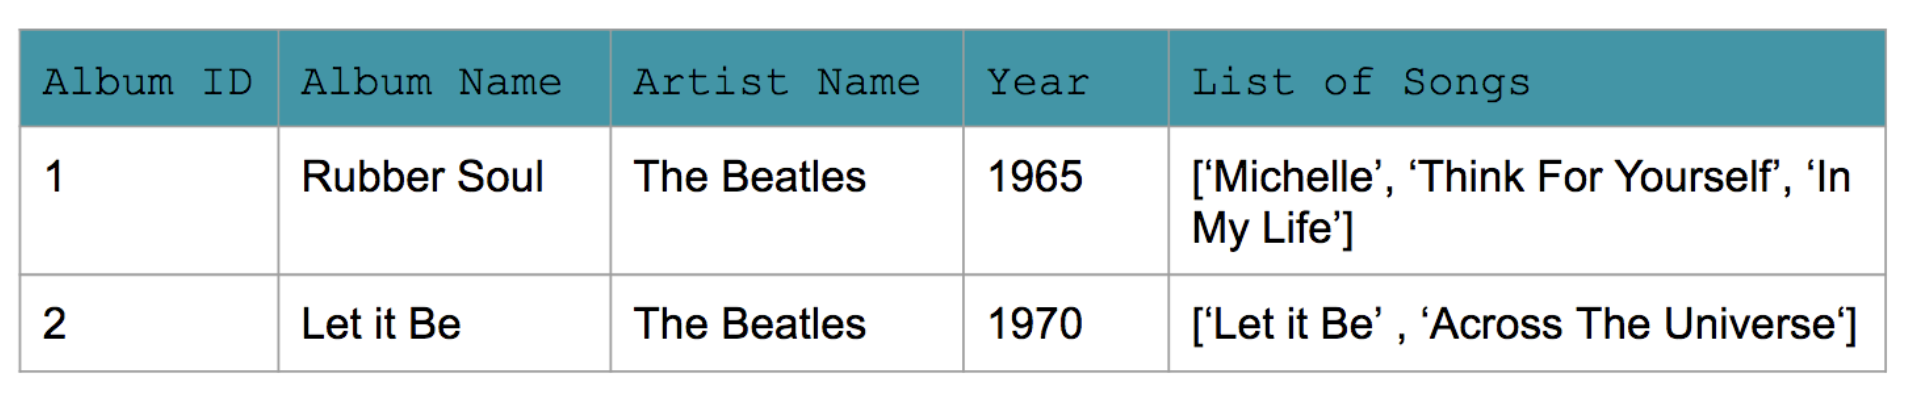

### Example of Normalized Data:
Now for normalized data, Amanda used 3NF. You see a few changes:

1) No row contains a list of items. For e.g., the list of song has been replaced with each song having its own row in the Song table.

2) Transitive dependencies have been removed. For e.g., album ID is the PRIMARY KEY for the album year in Album Table. Similarly, each of the other tables have a unique primary key that can identify the other values in the table (e.g., song id and song name within Song table).

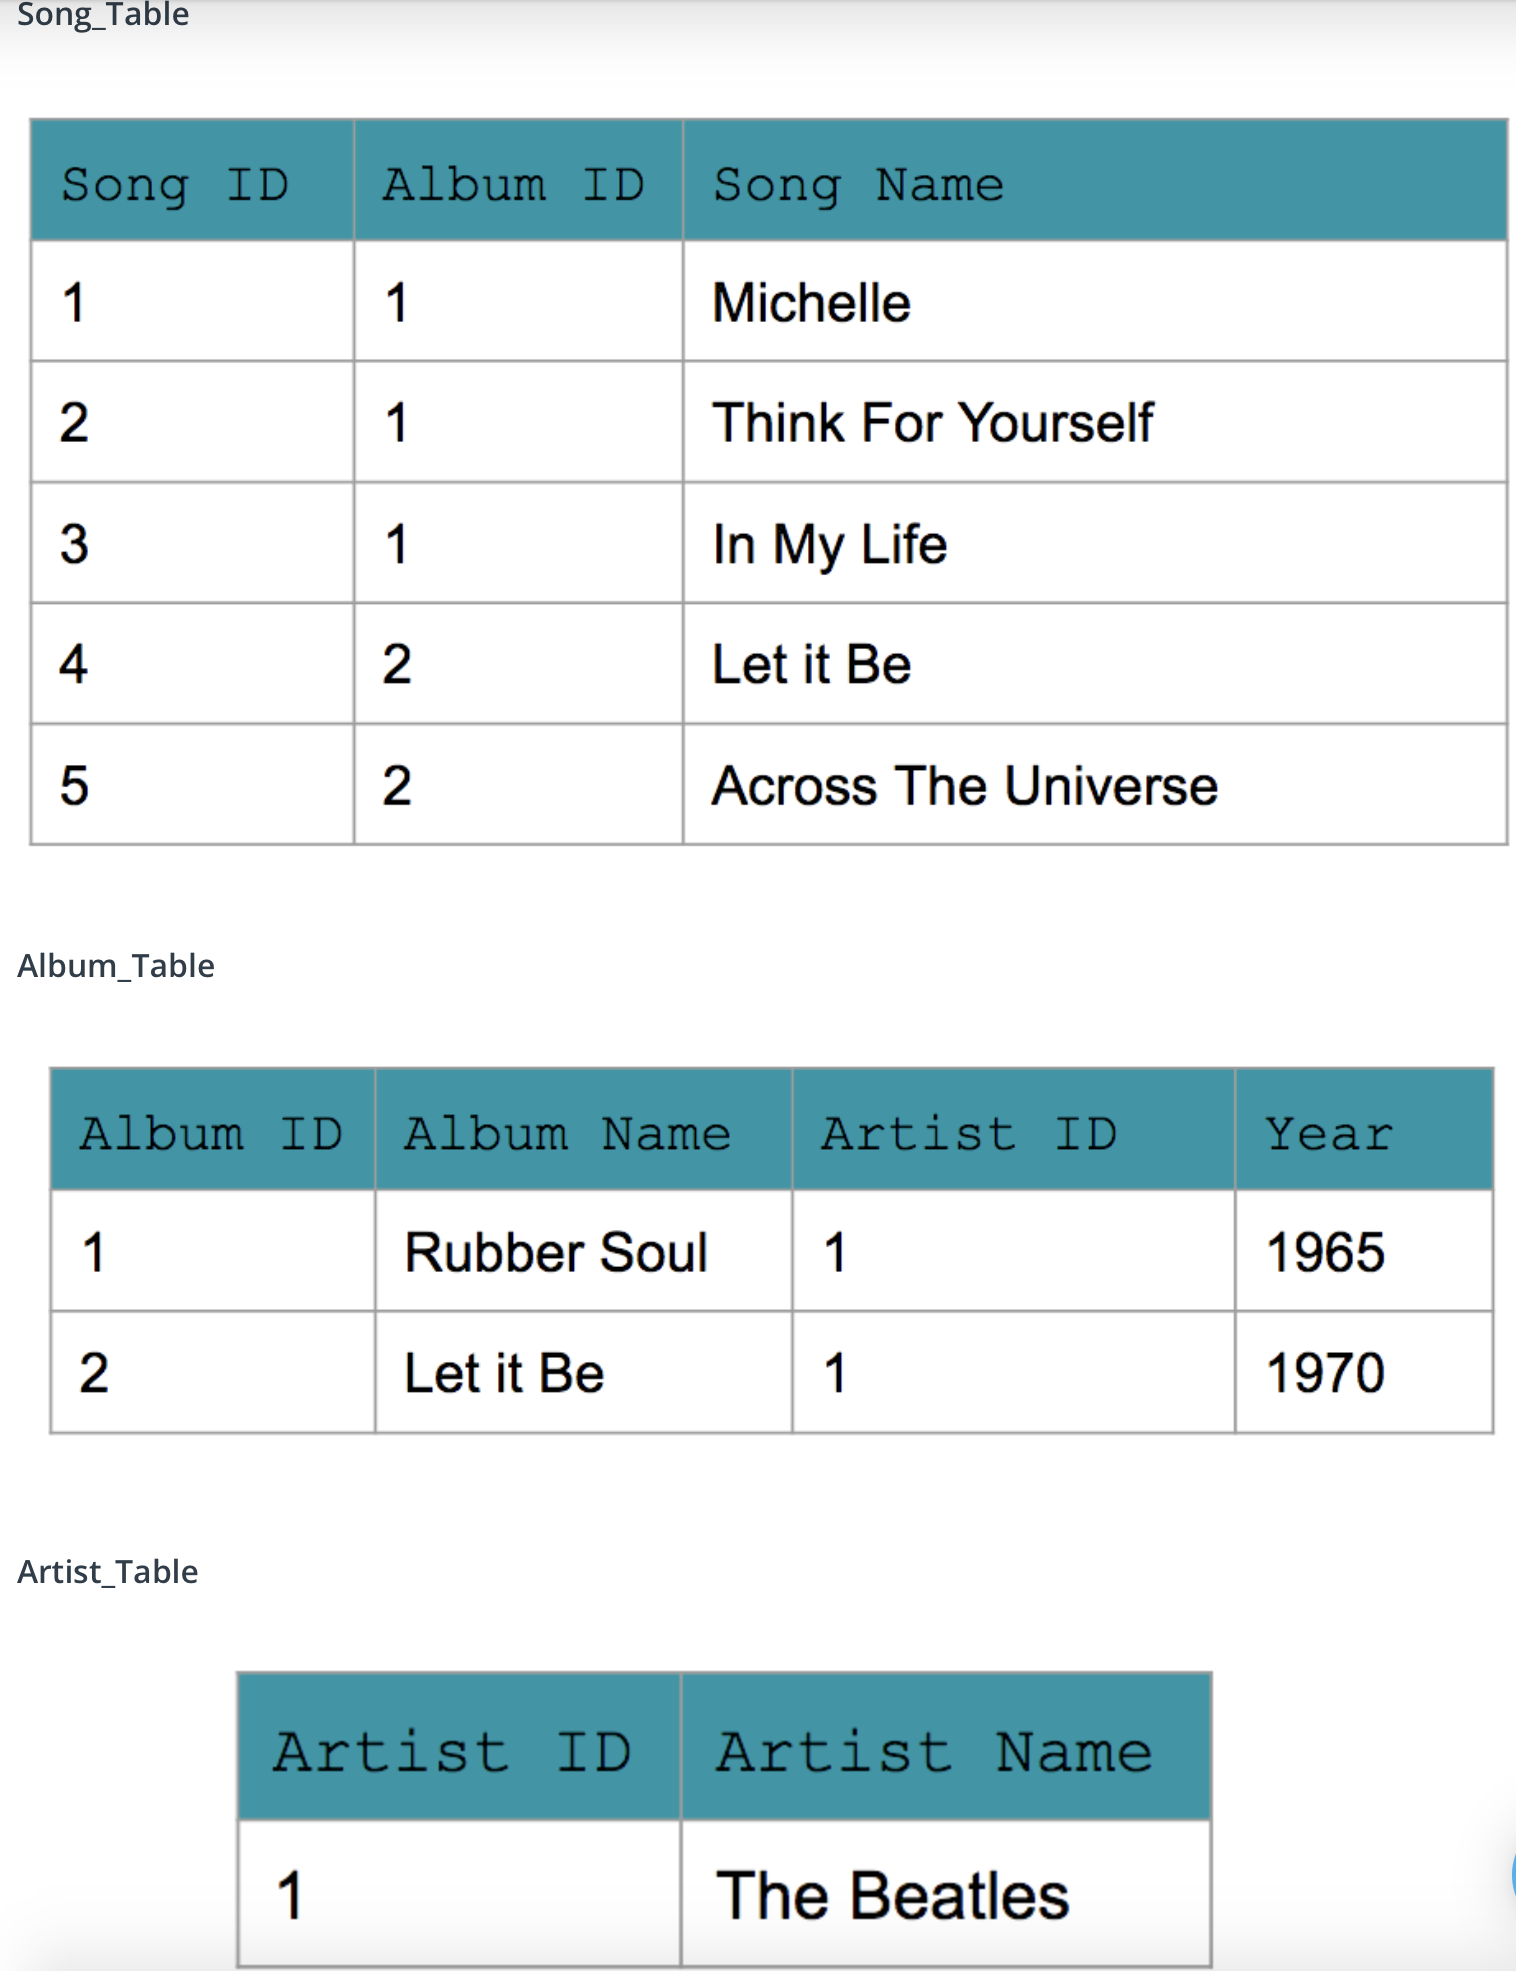

## Walk through the basics of modeling data from normalized from to denormalized form. We will create tables in PostgreSQL, insert rows of data, and do simple JOIN SQL queries to show how these multiple tables can work together. 

#### Where you see ##### you will need to fill in code. This exercise will be more challenging than the last. Use the information provided to create the tables and write the insert statements.

#### Remember the examples shown are simple, but imagine these situations at scale with large datasets, many users, and the need for quick response time. 

Note: __Do not__ click the blue Preview button in the lower task bar


### Import the library 
Note: An error might popup after this command has exectuted. If it does read it careful before ignoring. 

In [1]:
import psycopg2

### Create a connection to the database, get a cursor, and set autocommit to true

In [3]:
try: 
    conn = psycopg2.connect("host=localhost dbname=mydb user=edifierxuhao password=******")
except psycopg2.Error as e: 
    print("Error: Could not make connection to the Postgres database")
    print(e)
try: 
    cur = conn.cursor()
except psycopg2.Error as e: 
    print("Error: Could not get cursor to the Database")
    print(e)
conn.set_session(autocommit=True)

#### Let's start with our normalized (3NF) database set of tables we had in the last exercise, but we have added a new table `sales`. 

`Table Name: transactions2 
column 0: transaction_id
column 1: customer_name
column 2: cashier_id
column 3: year `

`Table Name: albums_sold
column 0: album_id
column 1: transaction_id
column 3: album_name` 

`Table Name: employees
column 0: employee_id
column 1: employee_name `

`Table Name: sales
column 0: transaction_id
column 1: amount_spent
`


### TO-DO: Add all Create statements for all Tables and Insert data into the tables

In [17]:



# TO-DO: Add all Create statements for all tables
try: 
    cur.execute("CREATE TABLE IF NOT EXISTS transactions2 (transaction_id int,\
                                                          customer_name VARCHAR,\
                                                          cashier_id int,\
                                                          year int)")
except psycopg2.Error as e: 
    print("Error: Issue creating table")
    print (e)

try: 
    cur.execute("CREATE TABLE IF NOT EXISTS albums_sold (album_id int,\
                                                          transaction_id int,\
                                                          album_name VARCHAR)")
except psycopg2.Error as e: 
    print("Error: Issue creating table")
    print (e)

try: 
    cur.execute("CREATE TABLE IF NOT EXISTS employees (employee_id int,\
                                                          employee_name VARCHAR)")
except psycopg2.Error as e: 
    print("Error: Issue creating table")
    print (e)

try: 
    cur.execute("CREATE TABLE IF NOT EXISTS sales (transaction_id int,\
                                                          amount_spent int)")
except psycopg2.Error as e: 
    print("Error: Issue creating table")
    print (e)

      
# TO-DO: Insert data into the tables    
    
    
    
try: 
    cur.execute("INSERT INTO transactions2 (transaction_id, customer_name, cashier_id, year) \
                 VALUES (%s, %s, %s, %s)", \
                 (1, "Amanda", 1, 2000))
except psycopg2.Error as e: 
    print("Error: Inserting Rows")
    print (e)

try: 
    cur.execute("INSERT INTO transactions2 (transaction_id, customer_name, cashier_id, year) \
                 VALUES (%s, %s, %s, %s)", \
                 (2, "Toby", 1, 2000))
except psycopg2.Error as e: 
    print("Error: Inserting Rows")
    print (e)
    
try: 
    cur.execute("INSERT INTO transactions2 (transaction_id, customer_name, cashier_id, year) \
                 VALUES (%s, %s, %s, %s)", \
                 (3, "Max", 2, 2018))
except psycopg2.Error as e: 
    print("Error: Inserting Rows")
    print (e)
    
try: 
    cur.execute("INSERT INTO albums_sold (album_id, transaction_id, album_name) \
                 VALUES (%s, %s, %s)", \
                 (1, 1, "Rubber Soul"))
except psycopg2.Error as e: 
    print("Error: Inserting Rows")
    print (e)

try: 
    cur.execute("INSERT INTO albums_sold (album_id, transaction_id, album_name) \
                 VALUES (%s, %s, %s)", \
                 (2, 1, "Let It Be"))
except psycopg2.Error as e: 
    print("Error: Inserting Rows")
    print (e)
    
try: 
    cur.execute("INSERT INTO albums_sold (album_id, transaction_id, album_name) \
                 VALUES (%s, %s, %s)", \
                 (3, 2, "My Generation"))
except psycopg2.Error as e: 
    print("Error: Inserting Rows")
    print (e)
    
try: 
    cur.execute("INSERT INTO albums_sold (album_id, transaction_id, album_name) \
                 VALUES (%s, %s, %s)", \
                 (4, 3, "Meet the Beatles"))
except psycopg2.Error as e: 
    print("Error: Inserting Rows")
    print (e)

try: 
    cur.execute("INSERT INTO albums_sold (album_id, transaction_id, album_name) \
                 VALUES (%s, %s, %s)", \
                 (5, 3, "Help!"))
except psycopg2.Error as e: 
    print("Error: Inserting Rows")
    print (e)

try: 
    cur.execute("INSERT INTO employees (employee_id, employee_name) \
                 VALUES (%s, %s)", \
                 (1, "Sam"))
except psycopg2.Error as e: 
    print("Error: Inserting Rows")
    print (e)

try: 
    cur.execute("INSERT INTO employees (employee_id, employee_name) \
                 VALUES (%s, %s)", \
                 (2, "Bob"))
except psycopg2.Error as e: 
    print("Error: Inserting Rows")
    print (e)    
    
try: 
    cur.execute("INSERT INTO sales (transaction_id, amount_spent) \
                 VALUES (%s, %s)", \
                 (1, 40))
except psycopg2.Error as e: 
    print("Error: Inserting Rows")
    print (e)    
    
try: 
    cur.execute("INSERT INTO sales (transaction_id, amount_spent) \
                 VALUES (%s, %s)", \
                 (2, 19))
except psycopg2.Error as e: 
    print("Error: Inserting Rows")
    print (e) 

try: 
    cur.execute("INSERT INTO sales (transaction_id, amount_spent) \
                 VALUES (%s, %s)", \
                 (3, 45))
except psycopg2.Error as e: 
    print("Error: Inserting Rows")
    print (e) 

#### TO-DO: Confirm using the Select statement the data were added correctly

In [18]:
print("Table: transactions2\n")
try: 
    cur.execute("SELECT * FROM transactions2;")
except psycopg2.Error as e: 
    print("Error: select *")
    print (e)

row = cur.fetchone()
while row:
   print(row)
   row = cur.fetchone()

print("\nTable: albums_sold\n")
try: 
    cur.execute("SELECT * FROM albums_sold;")
except psycopg2.Error as e: 
    print("Error: select *")
    print (e)

row = cur.fetchone()
while row:
   print(row)
   row = cur.fetchone()

print("\nTable: employees\n")
try: 
    cur.execute("SELECT * FROM employees;")
except psycopg2.Error as e: 
    print("Error: select *")
    print (e)

row = cur.fetchone()
while row:
   print(row)
   row = cur.fetchone()
    
print("\nTable: sales\n")
try: 
    cur.execute("SELECT * FROM sales;")
except psycopg2.Error as e: 
    print("Error: select *")
    print (e)

row = cur.fetchone()
while row:
   print(row)
   row = cur.fetchone()

Table: transactions2

(1, 'Amanda', 1, 2000)
(2, 'Toby', 1, 2000)
(3, 'Max', 2, 2018)

Table: albums_sold

(1, 1, 'Rubber Soul')
(2, 1, 'Let It Be')
(3, 2, 'My Generation')
(4, 3, 'Meet the Beatles')
(5, 3, 'Help!')

Table: employees

(1, 'Sam')
(2, 'Bob')

Table: sales

(1, 40)
(2, 19)
(3, 45)


### Let's say you need to do a query that gives:

`transaction_id
 customer_name
 cashier_name
 year 
 albums sold
 amount sold` 

### TO-DO: Complete the statement below to perform a 3 way `JOIN` on the 4 tables you have created. 

In [21]:
try: 
    cur.execute("SELECT t.transaction_id, t.customer_name, e.employee_name,t.year, a.album_name,s.amount_spent\
                 FROM transactions2 t JOIN albums_sold a\
                 ON t.transaction_id = a.transaction_id\
                 JOIN employees e\
                 ON e.employee_id = t.cashier_id\
                 JOIN sales s\
                 ON t.transaction_id = s.transaction_id")
    
    
except psycopg2.Error as e: 
    print("Error: select *")
    print (e)

row = cur.fetchone()
while row:
    print(row)
    row = cur.fetchone()

(1, 'Amanda', 'Sam', 2000, 'Rubber Soul', 40)
(1, 'Amanda', 'Sam', 2000, 'Let It Be', 40)
(2, 'Toby', 'Sam', 2000, 'My Generation', 19)
(3, 'Max', 'Bob', 2018, 'Meet the Beatles', 45)
(3, 'Max', 'Bob', 2018, 'Help!', 45)


#### Great we were able to get the data we wanted.

### But, we had to perform a 3 way `JOIN` to get there. While it's great we had that flexibility, we need to remember that `JOINS` are slow and if we have a read heavy workload that required low latency queries we want to reduce the number of `JOINS`.  Let's think about denormalizing our normalized tables.

### With denormalization you want to think about the queries you are running and how to reduce the number of JOINS even if that means duplicating data. The following are the queries you need to run.

### Query 1 : `select transaction_id, customer_name, amount_spent FROM <min number of tables>` 
It should generate the amount spent on each transaction 
### Query 2: `select cashier_name, SUM(amount_spent) FROM <min number of tables> GROUP BY cashier_name` 
It should generate the total sales by cashier 

###  Query 1: `select transaction_id, customer_name, amount_spent FROM <min number of tables>`

One way to do this would be to do a JOIN on the `sales` and `transactions2` table but we want to minimize the use of `JOINS`.  

To reduce the number of tables, first add `amount_spent` to the `transactions` table so that you will not need to do a JOIN at all. 

`Table Name: transactions 
column 0: transaction Id
column 1: Customer Name
column 2: Cashier Id
column 3: Year
column 4: amount_spent`

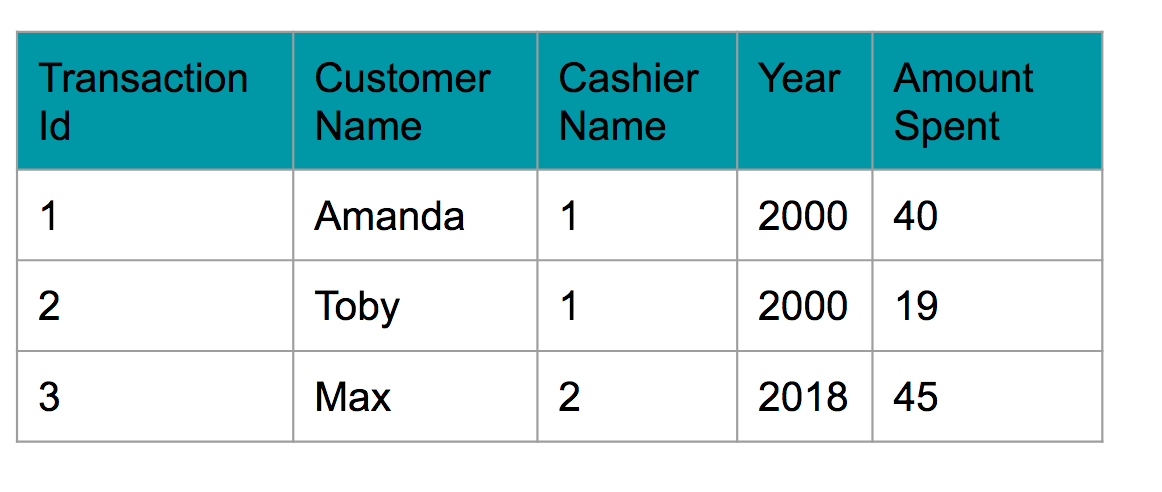

### TO-DO: Add the tables as part of the denormalization process

In [22]:
# TO-DO: Create all tables
try: 
    cur.execute("CREATE TABLE IF NOT EXISTS transactions (transaction_id int,\
                                                          customer_name VARCHAR,\
                                                          cashier_id int,\
                                                          year int,\
                                                          amount_spent int)")

except psycopg2.Error as e: 
    print("Error: Issue creating table")
    print (e)



#Insert data into all tables 
    
try: 
    cur.execute("INSERT INTO transactions (transaction_id,customer_name,cashier_id,year,amount_spent) \
                 VALUES (%s, %s, %s, %s, %s)", \
                 (1,'Amanda',1,2000,40))
except psycopg2.Error as e: 
    print("Error: Inserting Rows")
    print (e)
    
try: 
    cur.execute("INSERT INTO transactions (transaction_id,customer_name,cashier_id,year,amount_spent) \
                 VALUES (%s, %s, %s, %s, %s)", \
                 (2,'Toby',1,2000,19))
except psycopg2.Error as e: 
    print("Error: Inserting Rows")
    print (e)
    
try: 
    cur.execute("INSERT INTO transactions (transaction_id,customer_name,cashier_id,year,amount_spent) \
                 VALUES (%s, %s, %s, %s, %s)", \
                 (3,'Max',2,2018,45))
except psycopg2.Error as e: 
    print("Error: Inserting Rows")
    print (e)

### Now you should be able to do a simplifed query to get the information you need. No  `JOIN` is needed.

In [23]:
try: 
    cur.execute("SELECT transaction_id,customer_name,amount_spent\
                 FROM transactions")
        
except psycopg2.Error as e: 
    print("Error: select *")
    print (e)

row = cur.fetchone()
while row:
    print(row)
    row = cur.fetchone()

(1, 'Amanda', 40)
(2, 'Toby', 19)
(3, 'Max', 45)


#### Your output for the above cell should be the following:
(1, 'Amanda', 40)<br>
(2, 'Toby', 19)<br>
(3, 'Max', 45)

### Query 2: `select cashier_name, SUM(amount_spent) FROM <min number of tables> GROUP BY cashier_name` 

To avoid using any `JOINS`, first create a new table with just the information we need. 

`Table Name: cashier_sales
col: Transaction Id
Col: Cashier Name
Col: Cashier Id
col: Amount_Spent
`

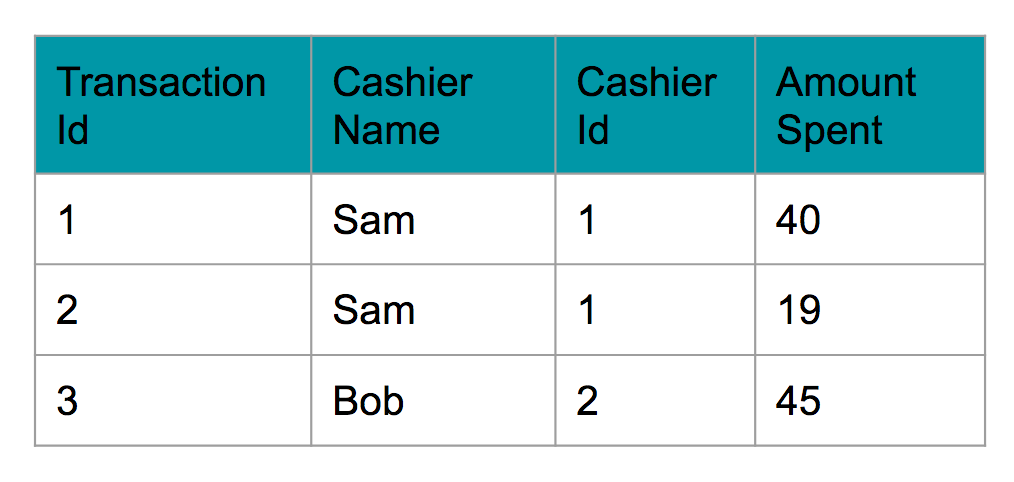

### TO-DO: Create a new table with just the information you need.

In [24]:
# Create the tables

try: 
    cur.execute("CREATE TABLE IF NOT EXISTS cashier_sales (transaction_id int,\
                                                          customer_name VARCHAR,\
                                                          cashier_id int,\
                                                          amount_spent int)")
except psycopg2.Error as e: 
    print("Error: Issue creating table")
    print (e)


#Insert into all tables 
    
try: 
    cur.execute("INSERT INTO cashier_sales (transaction_id,customer_name,cashier_id,amount_spent) \
                 VALUES (%s, %s, %s, %s)", \
                 (1,'Sam',1,40 ))
except psycopg2.Error as e: 
    print("Error: Inserting Rows")
    print (e)

try: 
    cur.execute("INSERT INTO cashier_sales (transaction_id,customer_name,cashier_id,amount_spent) \
                 VALUES (%s, %s, %s, %s)", \
                 (2,'Sam',1,19 ))
except psycopg2.Error as e: 
    print("Error: Inserting Rows")
    print (e)

try: 
    cur.execute("INSERT INTO cashier_sales (transaction_id,customer_name,cashier_id,amount_spent) \
                 VALUES (%s, %s, %s, %s)", \
                 (3,'Bob',2,45 ))

except psycopg2.Error as e: 
    print("Error: Inserting Rows")
    print (e)

### Run the query

In [25]:
try: 
    cur.execute("SELECT customer_name, SUM(amount_spent)\
                 FROM cashier_sales\
                 GROUP BY customer_name")
        
except psycopg2.Error as e: 
    print("Error: select *")
    print (e)

row = cur.fetchone()
while row:
   print(row)
   row = cur.fetchone()

('Sam', 59)
('Bob', 45)


#### Your output for the above cell should be the following:
('Sam', 59)<br>
('Max', 45)



#### We have successfully taken normalized table and denormalized them inorder to speed up our performance and allow for simplier queries to be executed. 

### Drop the tables

In [26]:
try: 
    cur.execute("DROP table transactions2")
except psycopg2.Error as e: 
    print("Error: Dropping table")
    print (e)
try: 
    cur.execute("DROP table albums_sold")
except psycopg2.Error as e: 
    print("Error: Dropping table")
    print (e)
try: 
    cur.execute("DROP table employees")
except psycopg2.Error as e: 
    print("Error: Dropping table")
    print (e)
try: 
    cur.execute("DROP table sales")
except psycopg2.Error as e: 
    print("Error: Dropping table")
    print (e)
try: 
    cur.execute("DROP table transactions")
except psycopg2.Error as e: 
    print("Error: Dropping table")
    print (e)
try: 
    cur.execute("DROP table cashier_sales")
except psycopg2.Error as e: 
    print("Error: Dropping table")
    print (e)

### And finally close your cursor and connection. 

In [27]:
cur.close()
conn.close()

## Dimensional Modelling
Dimensional modeling is simpler, more expressive, and easier to understand. There are 3 basic concepts in dimensional modeling i.e. facts, dimensions and measures.
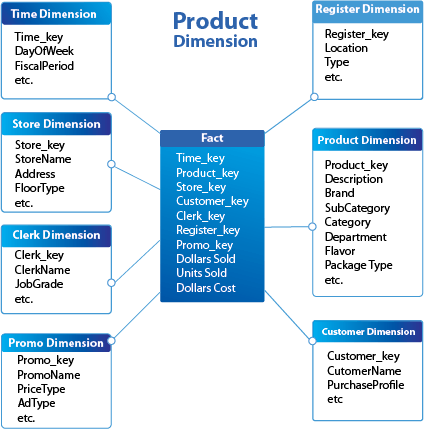

Dimensional modeling is primarily used to support OLAP and decision making while ER modeling is best fit for OLTP where results consist of detailed information of entities rather an aggregated view.

It provides four types of operations: **Drill down, Roll up, Slice and Dice**.

Drill down and roll up are the operations for moving the view down and up along the dimensional hierarchy levels to get more refined or bird-eye views. With drill-down capability, users can navigate to higher levels of detail. With roll-up capability, users can zoom out to see a summarized level of data.

Slice and dice are the operations for browsing the data through the visualized cube. Slicing cuts through the cube so that users can focus on some specific perspectives. Dicing rotates the cube to another perspective so that users can be more specific with the data analysis.

## Fact and Dimension Tables
- Work together to create an organized data model
- While fact and dimension are not created differently in the DDL, they are conceptual and extremely important for organization.

### Fact tables
Fact tables consists of the measurements, metrics or facts of a business process.

### Dimension
A structure that categorizes facts and measures in order to enable users to answer business questions. Dimensions are people, products, place and time.

### Implementing Different Schemas
Two of the most popular(beacuse of their simplicity) data maet schema for data warehouses are:
1. Star Schema
2. Snowflake Schema

#### Citations for slides:

- https://en.wikipedia.org/wiki/Dimension_(data_warehouse)
- https://en.wikipedia.org/wiki/Fact_table

The following image shows the relationship between the fact and dimension tables for the example shown in the video. As you can see in the image, the unique primary key for each Dimension table is included in the Fact table.

In this example, it helps to think about the Dimension tables providing the following information:

- Where the product was bought? (Dim_Store table)
- When the product was bought? (Dim_Date table)
- What product was bought? (Dim_Product table)

The Fact table provides the metric of the business process (here Sales).

- How many units of products were bought? (Fact_Sales table)

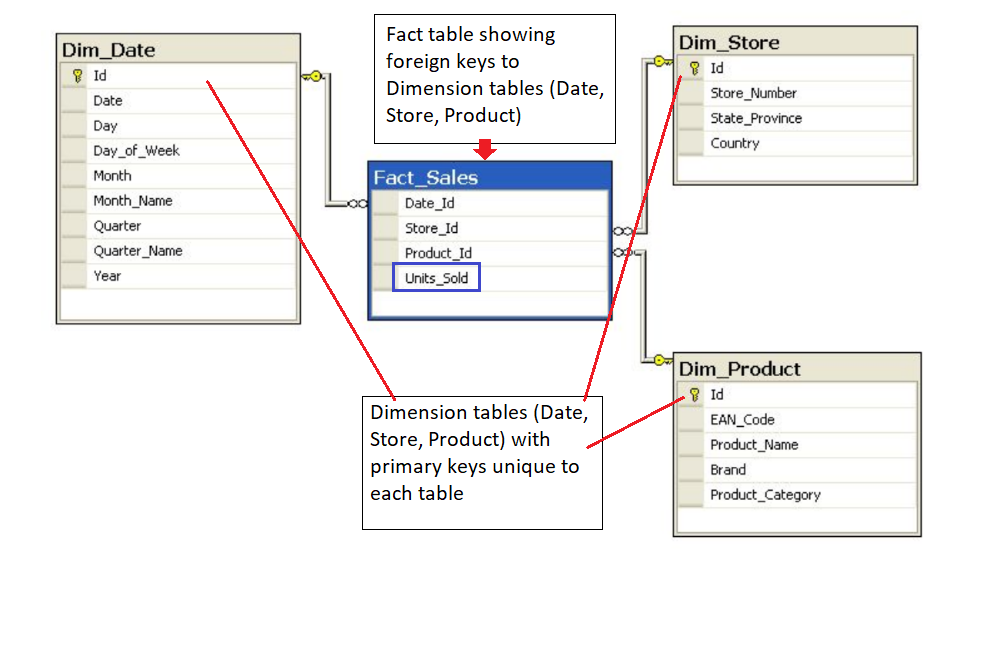

If you are familiar with **Entity Relationship Diagrams** (ERD), you will find the depiction of STAR and SNOWFLAKE schemas in the demo familiar. The ERDs show the data model in a concise way that is also easy to interpret. ERDs can be used for any data model, and are not confined to STAR or SNOWFLAKE schemas. Commonly available tools can be used to generate ERDs. However, more important than creating an ERD is to learn more about the data through conversations with the data team so as a data engineer you have a strong understanding of the data you are working with.

More information about ER diagrams can be found at this [Wikipedia](https://en.wikipedia.org/wiki/Entity–relationship_model) page.

## Star Schema
Star Schema is the simplest style of data mart schema. The star shema consists of one of more fact fables referencing any number of dimension tables.

This is one of the most used schema in the industry

### Why use star schema?
- Get its name from the physical model resembling a star shape
- A fact table is at its center
- Dimension tables surrounds the fact table representing the stra's points.

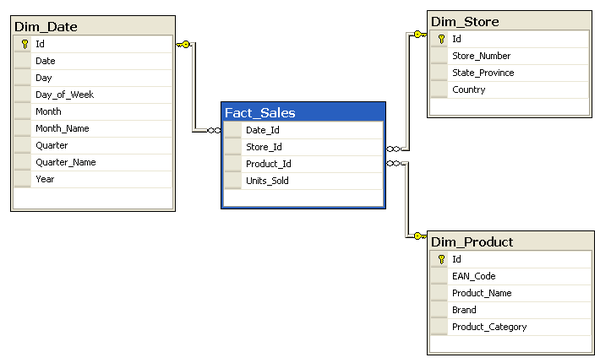

Reference for image in slides: https://en.wikipedia.org/wiki/Star_schema

Additional Resources
Check out this [Wikipedia page on Star schemas](https://en.wikipedia.org/wiki/Star_schema).

### Benifits
- Denormalized
- Simplifies queries
- Fast Aggregations

### Drawbacks
- Issues that cone with denormalization
- Data Integrity
- Decreas query flexibility
- many to man relationship


## Snowflake Schema
Logical arrangement of tables, in a multidimensional database represented by centralized fact tables which are connected to multiple dimensions.

A complex snowflake shape emerges when the dimensions of a snowflake schema are elaborated, having multiple levels of relationships, child tables having multiple parents.
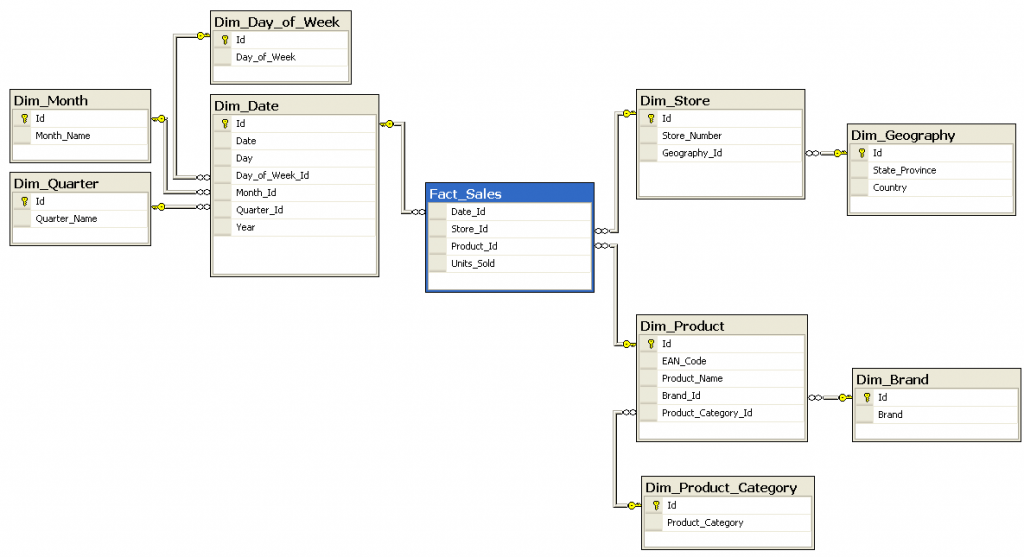

### Snowflake vs Star
- Star Schema is a special, simplified case of the snowflake schema.
- Star schema does allow for one to many relationships while the snowflake schema does.
- Snowflake shcema is more normalized than star schema, but only in 1NF or 2NF

### Additional Resources
Check out this Wikipedia page on [Snowflake schemas](https://en.wikipedia.org/wiki/Snowflake_schema).

This [Medium post](https://medium.com/@BluePi_In/deep-diving-in-the-world-of-data-warehousing-78c0d52f49a) provides a nice comparison, and examples, of Star and Snowflake Schemas. Make sure to scroll down halfway through the page.

### This exercise will be more challenging than the last. Use the information provided to create the tables and write the insert statements. 

### Import the library 
Note: An error might popup after this command has exectuted. If it does read it careful before ignoring. 

In [28]:
import psycopg2


### Create a connection to the database

In [29]:
try: 
    conn = psycopg2.connect("host=localhost dbname=mydb user=edifierxuhao password=******")
except psycopg2.Error as e: 
    print("Error: Could not make connection to the Postgres database")
    print(e)

### Next use that connect to get a cursor that we will use to execute queries.

In [30]:
try: 
    cur = conn.cursor()
except psycopg2.Error as e: 
    print("Error: Could not get cursor to the Database")
    print(e)

#### For this demo we will use automactic commit so that each action is commited without having to call conn.commit() after each command. The ability to rollback and commit transactions is a feature of Relational Databases. 

In [31]:
conn.set_session(autocommit=True)

### Imagine you work at an online Music Store. There will be many tables in our database, but let's just focus on 4 tables around customer purchases. 

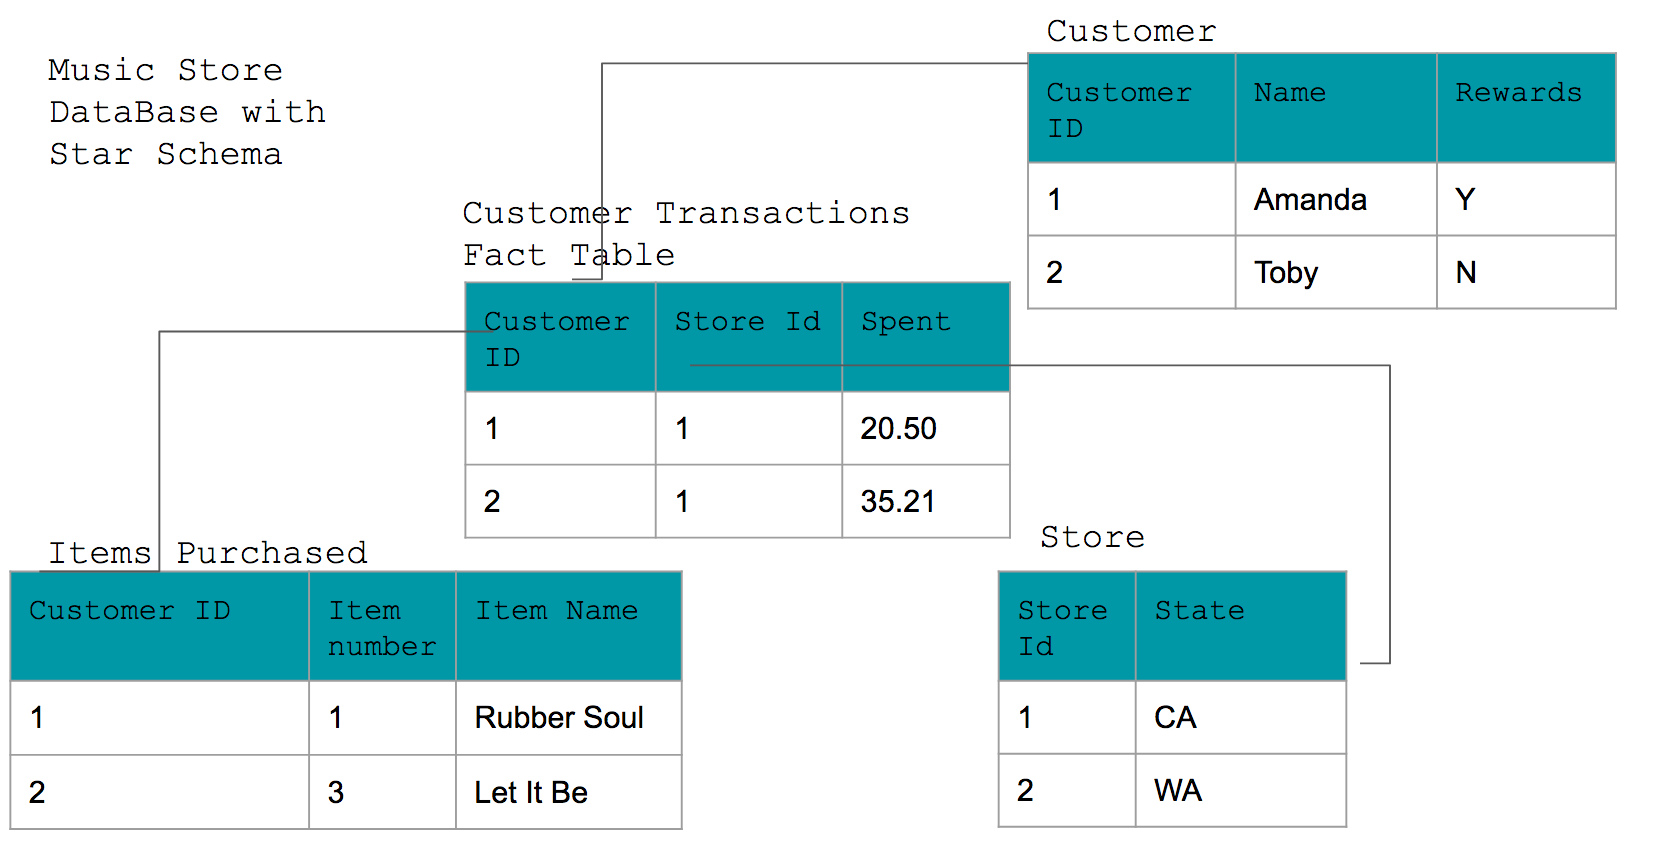

### From this representation you can start to see the makings of a "STAR". You will have one fact table (the center of the star) and 3  dimension tables that are coming from it.

### TO-DO: Create the Fact table and insert the data into the table

In [33]:
try: 
    cur.execute("CREATE TABLE IF NOT EXISTS customer_transactions(customer_id int,\
                                                                  store_id int,\
                                                                  spent numeric)")
except psycopg2.Error as e: 
    print("Error: Issue creating table")
    print (e)
    
#Insert into all tables 
try: 
    cur.execute("INSERT INTO customer_transactions (customer_id,store_id,spent) \
                 VALUES (%s, %s, %s)", \
                 (1,1,20.50 ))
except psycopg2.Error as e: 
    print("Error: Inserting Rows")
    print (e)

try: 
    cur.execute("INSERT INTO customer_transactions (customer_id,store_id,spent) \
                 VALUES (%s, %s, %s)", \
                 (2,1,35.21 ))
except psycopg2.Error as e: 
    print("Error: Inserting Rows")
    print (e)

### TO-DO: Create the Dimension tables and insert data into those tables.

In [34]:
try: 
    cur.execute("CREATE TABLE IF NOT EXISTS customer(customer_id int,\
                                                     name VARCHAR,\
                                                     rewards BOOLEAN)")
except psycopg2.Error as e: 
    print("Error: Issue creating table")
    print (e)
    
try: 
    cur.execute("CREATE TABLE IF NOT EXISTS items_purchased(customer_id int,\
                                                            item_number int,\
                                                            item_name VARCHAR)")
except psycopg2.Error as e: 
    print("Error: Inserting Rows")
    print (e)
    
try: 
    cur.execute("CREATE TABLE IF NOT EXISTS store(store_id int,\
                                                  state VARCHAR)")
except psycopg2.Error as e: 
    print("Error: Inserting Rows")
    print (e)
    
try: 
    cur.execute("INSERT INTO customer (customer_id,name,rewards) \
                 VALUES (%s, %s, %s)", \
                 (1,'Amanda',True ))
except psycopg2.Error as e: 
    print("Error: Issue creating table")
    print (e)
    
try: 
    cur.execute("INSERT INTO customer (customer_id,name,rewards) \
                 VALUES (%s, %s, %s)", \
                 (2,'Toby',False ))
except psycopg2.Error as e: 
    print("Error: Inserting Rows")
    print (e)
    
try: 
    cur.execute("INSERT INTO items_purchased (customer_id,item_number,item_name) \
                 VALUES (%s, %s, %s)", \
                 (1,1,'Rubber Soul' ))
except psycopg2.Error as e: 
    print("Error: Inserting Rows")
    print (e)
    
try: 
    cur.execute("INSERT INTO items_purchased (customer_id,item_number,item_name) \
                 VALUES (%s, %s, %s)", \
                 (2,3,'Let It Be' ))
except psycopg2.Error as e: 
    print("Error: Issue creating table")
    print (e)
    
try: 
    cur.execute("INSERT INTO store (store_id,state) \
                 VALUES (%s, %s)", \
                 (1,'CA' ))
except psycopg2.Error as e: 
    print("Error: Inserting Rows")
    print (e)

try: 
    cur.execute("INSERT INTO store (store_id,state) \
                 VALUES (%s, %s)", \
                 (2,'WA' ))
except psycopg2.Error as e: 
    print("Error: Inserting Rows")
    print (e)

### Now run the following queries on this data easily because of utilizing the Fact/ Dimension and Star Schema
 
#### Query 1: Find all the customers that spent more than 30 dollars, who are they, which store they bought it from, location of the store, what they bought and if they are a rewards member.

#### Query 2: How much did Customer 2 spend?

### Query 1:

In [37]:
try: 
    cur.execute("SELECT c.name, s.store_id,s.state,i.item_name,c.rewards\
                 FROM customer_transactions ct JOIN customer c\
                 ON ct.customer_id = c.customer_id\
                 JOIN items_purchased i\
                 ON ct.customer_id = i.customer_id\
                 JOIN store s\
                 ON ct.store_id = s.store_id\
                 WHERE ct.spent > 30")
except psycopg2.Error as e: 
    print("Error: select *")
    print (e)

row = cur.fetchone()
while row:
    print(row)
    row = cur.fetchone()

('Toby', 1, 'CA', 'Let It Be', 'N')


### Query 2: 

In [39]:
try: 
    cur.execute("SELECT customer_id,SUM(spent)\
                 FROM customer_transactions\
                 WHERE customer_id = 2\
                 GROUP BY customer_id")
except psycopg2.Error as e: 
    print("Error: select *")
    print (e)

row = cur.fetchone()
while row:
    print(row)
    row = cur.fetchone()

(2, 35.21)


### Summary: You can see here from this elegant schema that we were: 1) able to get "facts/metrics" from our fact table (how much each store sold), and 2) information about our customers that will allow us to do more indepth analytics to get answers to business questions by utilizing our fact and dimension tables. 

### TO-DO: Drop the tables

In [40]:
try: 
    cur.execute("DROP table customer_transactions")
except psycopg2.Error as e: 
    print("Error: Dropping table")
    print (e)

try: 
    cur.execute("DROP table customer")
except psycopg2.Error as e: 
    print("Error: Dropping table")
    print (e)
    
try: 
    cur.execute("DROP table items_purchased")
except psycopg2.Error as e: 
    print("Error: Dropping table")
    print (e)
    
try: 
    cur.execute("DROP table store")
except psycopg2.Error as e: 
    print("Error: Dropping table")
    print (e)

### And finally close your cursor and connection. 

In [41]:
cur.close()
conn.close()

## Data Definition and Constraints
The CREATE statement in SQL has a few important constraints that are highlighted below.

## NOT NULL
The **NOT NULL** constraint indicates that the column cannot contain a null value.

Here is the syntax for adding a **NOT NULL** constraint to the CREATE statement:

```sql
CREATE TABLE IF NOT EXISTS customer_transactions (
    customer_id int NOT NULL, 
    store_id int, 
    spent numeric
);
```

You can add **NOT NULL** constraints to more than one column. Usually this occurs when you have a **COMPOSITE KEY**, which will be discussed further below.

Here is the syntax for it:

```sql
CREATE TABLE IF NOT EXISTS customer_transactions (
    customer_id int NOT NULL, 
    store_id int NOT NULL, 
    spent numeric
);
```

## UNIQUE
The **UNIQUE** constraint is used to specify that the data across all the rows in one column are unique within the table. The **UNIQUE** constraint can also be used for multiple columns, so that the combination of the values across those columns will be unique within the table. In this latter case, the values within 1 column do not need to be unique. 

Let's look at an example.

```sql
CREATE TABLE IF NOT EXISTS customer_transactions (
    customer_id int NOT NULL UNIQUE, 
    store_id int NOT NULL UNIQUE, 
    spent numeric 
);
```

Another way to write a **UNIQUE** constraint is to add a table constraint using commas to separate the columns.

```sql
CREATE TABLE IF NOT EXISTS customer_transactions (
    customer_id int NOT NULL, 
    store_id int NOT NULL, 
    spent numeric,
    UNIQUE (customer_id, store_id, spent)
);
```

## PRIMARY KEY
The **PRIMARY KEY** constraint is defined on a single column, and every table should contain a primary key. This requires that the values be both unique and not null. The values in this column uniquely identify the rows in the table. If a group of columns are defined as a primary key, they are called a **composite key**. That means the combination of values in these columns will uniquely identify the rows in the table. By default, the **PRIMARY KEY** constraint has the unique and not null constraint built into it. 

Let's look at the following example:

```sql
CREATE TABLE IF NOT EXISTS store (
    store_id int PRIMARY KEY, 
    store_location_city text,
    store_location_state text
);
```

Here is an example for a group of columns serving as **composite key**.

```sql
CREATE TABLE IF NOT EXISTS customer_transactions (
    customer_id int, 
    store_id int, 
    spent numeric,
    PRIMARY KEY (customer_id, store_id)
);
```

To read more about these constraints, check out the [PostgreSQL documentation](https://www.postgresql.org/docs/9.4/ddl-constraints.html).

## Foreign Keys

```sql
CREATE TABLE products (
    product_no integer PRIMARY KEY,
    name text,
    price numeric
);

CREATE TABLE orders (
    order_id integer PRIMARY KEY,
    shipping_address text,
    ...
);

CREATE TABLE order_items (
    product_no integer REFERENCES products,
    order_id integer REFERENCES orders,
    quantity integer,
    PRIMARY KEY (product_no, order_id)
);
```
Notice that the primary key overlaps with the foreign keys in the last table.

We know that the foreign keys disallow creation of orders that do not relate to any products. But what if a product is removed after an order is created that references it? SQL allows you to handle that as well. Intuitively, we have a few options:

- Disallow deleting a referenced product

- Delete the orders as well

- Something else?

To illustrate this, let's implement the following policy on the many-to-many relationship example above: when someone wants to remove a product that is still referenced by an order (via order_items), we disallow it. If someone removes an order, the order items are removed as well:

```sql
CREATE TABLE products (
    product_no integer PRIMARY KEY,
    name text,
    price numeric
);

CREATE TABLE orders (
    order_id integer PRIMARY KEY,
    shipping_address text,
    ...
);

CREATE TABLE order_items (
    product_no integer REFERENCES products ON DELETE RESTRICT,
    order_id integer REFERENCES orders ON DELETE CASCADE,
    quantity integer,
    PRIMARY KEY (product_no, order_id)
);
```


## Check Constraints

A check constraint is the most generic constraint type. It allows you to specify that the value in a certain column must satisfy a Boolean (truth-value) expression. For instance, to require positive product prices, you could use:

```sql
CREATE TABLE products (
    product_no integer,
    name text,
    price numeric CHECK (price > 0)
);
```

As you see, the constraint definition comes after the data type, just like default value definitions. Default values and constraints can be listed in any order. A check constraint consists of the key word CHECK followed by an expression in parentheses. The check constraint expression should involve the column thus constrained, otherwise the constraint would not make too much sense.

You can also give the constraint a separate name. This clarifies error messages and allows you to refer to the constraint when you need to change it. The syntax is:

```sql
CREATE TABLE products (
    product_no integer,
    name text,
    price numeric CONSTRAINT positive_price CHECK (price > 0)
);
```

So, to specify a named constraint, use the key word CONSTRAINT followed by an identifier followed by the constraint definition. (If you don't specify a constraint name in this way, the system chooses a name for you.)

A check constraint can also refer to several columns. Say you store a regular price and a discounted price, and you want to ensure that the discounted price is lower than the regular price:

```sql
CREATE TABLE products (
    product_no integer,
    name text,
    price numeric CHECK (price > 0),
    discounted_price numeric CHECK (discounted_price > 0),
    CHECK (price > discounted_price)
);
```

The first two constraints should look familiar. The third one uses a new syntax. It is not attached to a particular column, instead it appears as a separate item in the comma-separated column list. Column definitions and these constraint definitions can be listed in mixed order.

We say that the first two constraints are column constraints, whereas the third one is a table constraint because it is written separately from any one column definition. Column constraints can also be written as table constraints, while the reverse is not necessarily possible, since a column constraint is supposed to refer to only the column it is attached to. (PostgreSQL doesn't enforce that rule, but you should follow it if you want your table definitions to work with other database systems.) The above example could also be written as:

```sql
CREATE TABLE products (
    product_no integer,
    name text,
    price numeric,
    CHECK (price > 0),
    discounted_price numeric,
    CHECK (discounted_price > 0),
    CHECK (price > discounted_price)
);
```

or even:

```sql
CREATE TABLE products (
    product_no integer,
    name text,
    price numeric CHECK (price > 0),
    discounted_price numeric,
    CHECK (discounted_price > 0 AND price > discounted_price)
);

```

It's a matter of taste.

Names can be assigned to table constraints in the same way as column constraints:
```sql
CREATE TABLE products (
    product_no integer,
    name text,
    price numeric,
    CHECK (price > 0),
    discounted_price numeric,
    CHECK (discounted_price > 0),
    CONSTRAINT valid_discount CHECK (price > discounted_price)
);
```

## Upsert
In RDBMS language, the term upsert refers to the idea of inserting a new row in an existing table, or updating the row if it already exists in the table. The action of updating or inserting has been described as "upsert".

The way this is handled in PostgreSQL is by using the `INSERT` statement in combination with the `ON CONFLICT` clause.

## INSERT
The **INSERT** statement adds in new rows within the table. The values associated with specific target columns can be added in any order.

Let's look at a simple example. We will use a customer address table as an example, which is defined with the following **CREATE** statement:

```sql
CREATE TABLE IF NOT EXISTS customer_address (
    customer_id int PRIMARY KEY, 
    customer_street varchar NOT NULL,
    customer_city text NOT NULL,
    customer_state text NOT NULL
);
```

Let's try to insert data into it by adding a new row:

```sql
INSERT into customer_address (
VALUES
    (432, '758 Main Street', 'Chicago', 'IL'
);
```

Now let's assume that the customer moved and we need to update the customer's address. However we do not want to add a new customer id. In other words, if there is any conflict on the `customer_id`, we do not want that to change.

This would be a good candidate for using the **ON CONFLICT DO NOTHING** clause.

```SQL
INSERT INTO customer_address (customer_id, customer_street, customer_city, customer_state)
VALUES
 (
 432, '923 Knox Street', 'Albany', 'NY'
 ) 
ON CONFLICT (customer_id) 
DO NOTHING;
```
Now, let's imagine we want to add more details in the existing address for an existing customer. This would be a good candidate for using the **ON CONFLICT DO UPDATE** clause.

```sql
INSERT INTO customer_address (customer_id, customer_street)
VALUES
    (
    432, '923 Knox Street, Suite 1' 
) 
ON CONFLICT (customer_id) 
DO UPDATE
    SET customer_street  = EXCLUDED.customer_street;
```

We recommend checking out these two links to learn other ways to insert data into the tables.

- [PostgreSQL tutorial](https://www.postgresqltutorial.com/postgresql-upsert/)
- [PostgreSQL documentation](https://www.postgresql.org/docs/9.5/sql-insert.html)

In [50]:
import psycopg2

try: 
    conn = psycopg2.connect("host=localhost dbname=mydb user=edifierxuhao password=****")
except psycopg2.Error as e: 
    print("Error: Could not make connection to the Postgres database")
    print(e)
    
try: 
    cur = conn.cursor()
except psycopg2.Error as e: 
    print("Error: Could not get cursor to the Database")
    print(e)
    
conn.set_session(autocommit=True)



In [78]:

cur.execute("CREATE TABLE IF NOT EXISTS customer_address (\
    customer_id int PRIMARY KEY, \
    customer_street varchar NOT NULL,\
    customer_city text NOT NULL,\
    customer_state text NOT NULL\
);")


In [79]:
cur.execute("INSERT into customer_address(customer_id,customer_street,customer_city,customer_state)\
VALUES(432, '758 Main Street', 'Chicago', 'IL')")

In [80]:
cur.execute("INSERT INTO customer_address (customer_id, customer_street, customer_city, customer_state)\
            VALUES (432, '923 Knox Street', 'Albany', 'NY') \
            ON CONFLICT (customer_id)\
            DO NOTHING;")


In [81]:
cur.execute("SELECT * FROM customer_address")


row = cur.fetchone()
while row:
    print(row)
    row = cur.fetchone()

(432, '758 Main Street', 'Chicago', 'IL')


In [83]:
cur.execute("INSERT INTO customer_address (customer_id, customer_street, customer_city, customer_state)\
             VALUES (432, '923 Knox Street, Suite 1', 'Albany', 'NY')\
             ON CONFLICT (customer_id) \
             DO UPDATE \
             SET customer_street  = EXCLUDED.customer_street;")


In [85]:
cur.execute("SELECT * FROM customer_address")


row = cur.fetchone()
while row:
    print(row)
    row = cur.fetchone()

(432, '923 Knox Street, Suite 1', 'Chicago', 'IL')


In [86]:
cur.execute('DROP table customer_address')

In [21]:
cur.close()
conn.close()

## What we learned:
- What makes a database a relational database and Codd’s 12 rules of relational database design
- The difference between different types of workloads for databases OLAP and OLTP
- The process of database normalization and the normal forms.
- Denormalization and when it should be used.
- Fact vs dimension tables as a concept and how to apply that to our data modeling
- How the star and snowflake schemas use the concepts of fact and dimension tables to make getting value out of the data easier.

# Non-Relational Databases

When Not to Use SQL:

- **Need high Availability in the data:** Indicates the system is always up and there is no downtime
- **Have Large Amounts of Data**
- **Need Linear Scalability:** The need to add more nodes to the system so performance will increase linearly
- **Low Latency:** Shorter delay before the data is transferred once the instruction for the transfer has been received.
- **Need fast reads and write**

Here is a helpful blog that describes the [different types of NoSQL databases](https://www.xenonstack.com/blog/nosql-databases/). You can bookmark it to review this later too.

**Apache Cassandra**
- Open Source NoSQL DB
- Masterless Architecture
- High Availability
- Linearly Scalable(when add more nodes into the system, the system will grow linearly)
- Used by Uber, Netflix, Hulu, Twitter, Facebook, etc
- Major contributors to the project: DataStax, Facebook, Twitter, Apple

## Distributed Databases

In a **distributed database**, in order to have **high availability**, you will **need copies of your data**.

1. **distributed database:** It's not just a single system, but a database made up of multiple machines. 
2. **high availability**: My system is always up, and have no downtime, or very little downtime. That isn't say that all my nodes are always up beacuse nodes will fail.
3. **need copies of your data**: have mutiple nodes, nodes can go down, means we need copies of the data. So my data may not up to date in all locations., This called **Eventual Consistency**.
4. **Eventual Consistency:** A consisitency model used in distribyted computing to achieve **high availablity** that informally gurarntees that, **if no new updates** are made to a given data item, eventually all accesses to that item will **return the last updated value**.

Over time (if no new changes are made) each copy of the data will be the same, but if there are new changes, the data may be different in different locations. The data may be inconsistent for only milliseconds. There are workarounds in place to prevent getting stale data.

### Commonly Asked Questions:

**What does the network look like? Can you share any examples?**
In Apache Cassandra every node is connected to every node -- it's peer to peer database architecture.

**Is data deployment strategy an important element of data modeling in Apache Cassandra?**

Deployment strategies are a great topic, but have very little to do with data modeling. Developing deployment strategies focuses on determining how many clusters to create or determining how many nodes are needed. These are topics generally covered under database architecture, database deployment and operations, which we will not cover in this lesson. Here is a useful link to learn more about it for [Apache Cassandra](https://docs.datastax.com/en/dse-planning/doc/).

In general, the size of your data and your data model can affect your deployment strategies. You need to think about how to create a cluster, how many nodes should be in that cluster, how to do the actual installation. More information about deployment strategies can be found on this [ataStax documentation page](https://docs.datastax.com/en/dse-planning/doc/)

**Citation for above slides:**

Here is the [Wikipedia page](https://en.wikipedia.org/wiki/Eventual_consistency) cited in the slides.

**Cassandra Architecture**

We are not going into a lot of details about the Apache Cassandra Architecture. However, if you would like to learn more about it for your job, here are some links that you may find useful.

Apache Cassandra Data Architecture:

- [Understanding the architecture](https://docs.datastax.com/en/archived/cassandra/3.0/cassandra/architecture/archTOC.html)
- [Cassandra Architecture](https://www.tutorialspoint.com/cassandra/cassandra_architecture.htm)

The following link will go more in-depth about the Apache Cassandra Data Model, how Cassandra reads, writes, updates, and deletes data.

- [Cassandra Documentation](https://docs.datastax.com/en/archived/cassandra/3.0/cassandra/dml/dmlIntro.html)


## CAP Theorem
A theorem in computer science that states it is **impossible** for a distributed data store to **simultaneously provide** more than two out of the following three guarantees of **consistency, availability**, and **partition tolarance**.

- **Consistency**: Every read from the database gets the latest (and correct) piece of data or an error

- **Availability**: Every request is received and a response is given -- without a guarantee that the data is the latest update

- **Partition Tolerance**: The system continues to work regardless of losing network connectivity between nodes

When a network partition failure happens should we decide to

- Cancel the operation and thus decrease the availability but ensure consistency
- Proceed with the operation and thus provide availability but risk inconsistency

The CAP theorem implies that in the presence of a network partition, one has to choose between consistency and availability.

Apache Cassandra is an AP(Availability and Partition tolerant) database.

### Additional Resource:

You can also check out this [Wikipedia page](https://en.wikipedia.org/wiki/CAP_theorem) on the CAP theorem.

### Commonly Asked Questions:

**Is Eventual Consistency the opposite of what is promised by SQL database per the ACID principle?** Much has been written about how Consistency is interpreted in the ACID principle and the CAP theorem. Consistency in the ACID principle refers to the requirement that only transactions that abide by constraints and database rules are written into the database, otherwise the database keeps previous state. In other words, the data should be correct across all rows and tables. However, consistency in the CAP theorem refers to every read from the database getting the latest piece of data or an error.

To learn more, you may find this discussion useful:

- [Discussion about ACID vs. CAP](https://www.voltdb.com/blog/2015/10/disambiguating-acid-cap/)

```
什么是ACID

ACID是事务的四个特性，指的是atomicity，原子性；consistency，一致性；isolation，隔离性；durability，持久性。

    原子性(atomicity): 指所有在事务中的操作要么都成功，要么都不成功，所有的操作都不可分割，没有中间状态。一旦某一步执行失败，就会全部回滚到初始状态。一致性(consistency): 指的是逻辑上的一致性，即所有操作是符合现实当中的期望的。具体参考下一节隔离性(isolation): 即不同事务之间的相互影响和隔离的程度。比如，不同的隔离级别，事务的并发程度也不同，最强的隔离状态是所有的事务都是串行化的（serializable）（即一个事务完成之后才能进行下一个事务），这样并发性也会降到最低，在保证了强一致性的情况下，性能也会受很大影响，所以在实际工程当中，往往会折中一下。持久性(durability): 可以简单地理解为事务执行完毕后数据不可逆并持久化存储于存储系统当中

理解一致性

实际上我们通常说的数据库事务的一致性和分布式系统的一致性并不是一个概念。这里可以区分成“内部一致性”和“外部一致性”。“内部一致性”搞数据库的人很少这么说，一般就直接说一致性，更准确的说是“Consistency in ACID”（“事务 ACID 属性中的一致性”）；“外部一致性”是针对分布式系统而言的，分布式领域提及的 Consistency 表示系统的正确性模型，著名的也是臭名昭著的 CAP 理论中的 C 就是这个范畴的。这主要是由于分布式系统写入和读取都可能不在同一台机器上，而这必然会有一段时间导致不同机器上所存的数据不一致的情况，这就是所谓的“不一致时间窗口”。
```
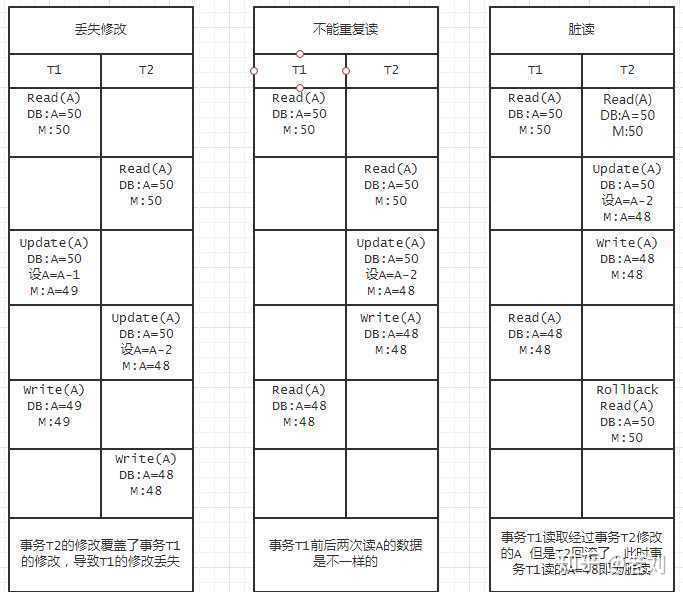
```
丢失修改、不可重复读、脏读

    修改丢失：丢失修改是事务A和B先后更改数据数据x（假设初始是x0)，但是在A未正式更改前，B已经读取了原先的数据x0，最后A更改后为x1，B更改的并不是A更新后的x1，而是更改的x0，更改后假设为x2，这时x2将x1覆盖了，相当于事务A针对x的更改丢失了。脏读： 事务T1读取了T2更改的x，但是T2在实际存储数据时可能出错回滚了，这时T1读取的实际是无效的数据，这种情况下就是脏读不可重复读：是说在T1读取x时，由于中间T2更改了x，所以T1前后两次读取的x值不相同，这就是所谓的不可重复读幻读：在T1读取符合某个条件的所有记录时，T2增加了一条符合该条件的记录，这就导致T1执行过程中前后读取的记录可能不一致，即T2之后读取时会多出一条记录。

其中前三种（丢失修改、不能重复读、脏读）都是由于并发事务在修改同一份数据的时候导致的问题，此类问题可以通过对同一个资源加锁的方式来解决，而最后一种情况是由于不同事务并发时，新增数据导致的问题，对于新增的记录是无法加锁的，此种情况只能通过事务的串行化来解决。而串行化与并发是矛盾的，所以要在性能和事务的一致性强度上取得一个平衡，就涉及到不同的隔离等级，关于隔离等级，详见理解隔离性一节。

理解隔离性

事务的隔离级别从低到高有
读未提交（Read uncommitted）、读提交（read committed）、可重复读（repeatable read）和串行化（Serializable）

    Read Uncommitted：事务读数据时不会加锁，写数据时会有行级共享锁。假设事务1先于事务2，当事务1更新数据的时候，事务2可以读取事务1未提交的数据，但是不能更新事务1正在更新的数据。而如果事务1只是读数据，那么事务2既可以读数据，也可以更新数据。
    这种情况下无法规避脏读，不可重复读的问题。Read Committed：即在一个事务修改数据过程中，如果事务还没提交，其他事务不能读该数据，或者说只能读取committed的数据。事务读数据的瞬间会加行级共享锁，一旦读完该行，立即释放该行级共享锁；而写数据的瞬间会加行级排它锁，直到事务结束。这种情况下就避免了脏读，但是却不能避免不可重复读的问题Repeatable Read：当然就再升一级，为的就是避免不可重复读的问题，所以名字叫repeatable read。怎么实现的呢，我们知道read committed是，事务读操作只在读的一瞬间加锁，读完这行就释放锁了，而repeatable read级别是读的一瞬间加锁，但是一直到事务结束才释放锁。但是repeatable read不能解决幻读的问题，因为幻读是增加记录，并不是更改原先的记录。Serialization：到达这一级别的隔离，可以彻底解决一致性的所有问题。一般来说是通过加表锁来解决串行化的问题。
```


**Which of these combinations is desirable for a production system - Consistency and Availability, Consistency and Partition Tolerance, or Availability and Partition Tolerance?**

As the CAP Theorem Wikipedia entry says, "The CAP theorem implies that in the presence of a network partition, one has to choose between consistency and availability." So there is no such thing as Consistency and Availability in a distributed database since it must always tolerate network issues. You can only have Consistency and Partition Tolerance (CP) or Availability and Partition Tolerance (AP). Remember, relational and non-relational databases do different things, and that's why most companies have both types of database systems.

**Does Cassandra meet just Availability and Partition Tolerance in the CAP theorem?**

According to the CAP theorem, a database can actually only guarantee two out of the three in CAP. So supporting Availability and Partition Tolerance makes sense, since Availability and Partition Tolerance are the biggest requirements.

**If Apache Cassandra is not built for consistency, won't the analytics pipeline break?**

If I am trying to do analysis, such as determining a trend over time, e.g., how many friends does John have on Twitter, and if you have one less person counted because of "eventual consistency" (the data may not be up-to-date in all locations), that's OK. In theory, that can be an issue but only if you are not constantly updating. If the pipeline pulls data from one node and it has not been updated, then you won't get it. Remember, in Apache Cassandra it is about **Eventual Consistency.**


## Importance Of Denormalization in Apache Cassandra

Denormalization of tables in Apache Cassandra is aboslutely critical. The biggest take away when doing data modeling in Apache Cassandra is to think about your queries first. There are no JOIN in Apache Cassandra.

- Denormalization is not just okay -- it's a must
- Denormalization must be done for fast reads
- Apache Cassandra has been optimized for fast writes
- ALWAYS think Queries first
- One table per query is a great strategy
- Apache Cassandra does not allow for JOINs between tables

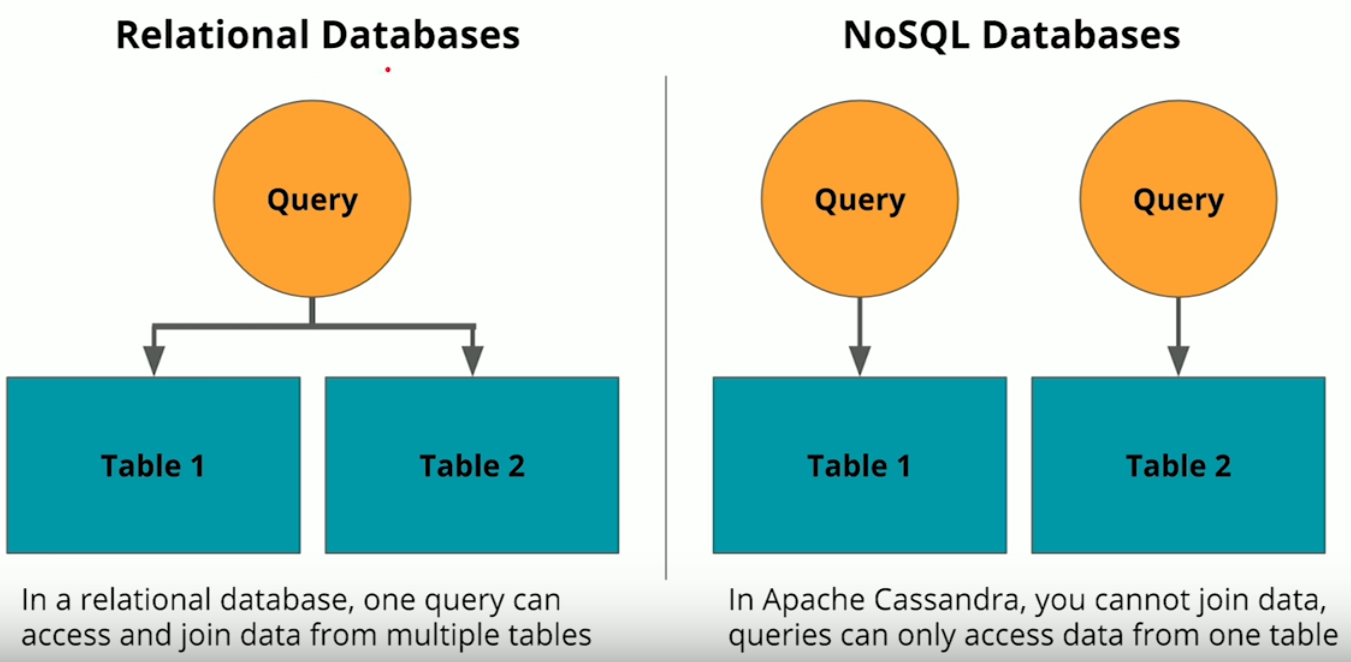

### two queries two tables
```sql
SELECT * 
FROM music_library
WHERE year = 1965
```
```sql
SELECT *
FROM album_library
WHERE artist_name = 'The Beatles'
```
There are data reduntency, but we have high performance no downtime system.

### Commonly Asked Questions:

- **I see certain downsides of this approach, since in a production application, requirements change quickly and I may need to improve my queries later. Isn't that a downside of Apache Cassandra?**

In Apache Cassandra, you want to model your data to your queries, and if your business need calls for quickly changing requirements, you need to create a new table to process the data. That is a requirement of Apache Cassandra. If your business needs calls for ad-hoc queries, these are not a strength of Apache Cassandra. However keep in mind that it is easy to create a new table that will fit your new query.

### Additional Resource:

Here is a reference to the DataStax documents on [Apache Cassandra](https://docs.datastax.com/en/dse/6.7/cql/cql/ddl/dataModelingApproach.html).

## Cassandra Query Language: CQL

Cassandra query language is the way to interact with the database and is very similar to SQL. JOINS, GROUP BY, or subqueries are not in CQL and are not supported by CQL.

# Lesson 3 Exercise 1: Three Queries Three Tables
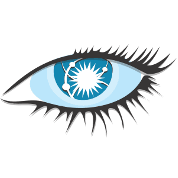

#### We will use a python wrapper/ python driver called cassandra to run the Apache Cassandra queries. This library should be preinstalled but in the future to install this library you can run this command in a notebook to install locally: 
```shell
$ ! pip install cassandra-driver
```
#### More documentation can be found here:  https://datastax.github.io/python-driver/


Start Cassandra:
```shell
$ cd xuhao3/apache-cassandra-4.0.0/
$ bin/cassandra
```

In [36]:
# Import Apache Cassandra python package
import cassandra

In [37]:
# Create a connection to the database
from cassandra.cluster import Cluster
try: 
    cluster = Cluster(['localhost']) #If you have a locally installed Apache Cassandra instance
    session = cluster.connect()
except Exception as e:
    print(e)

In [38]:
# Create a keyspace to work in
try:
    session.execute("""
    CREATE KEYSPACE IF NOT EXISTS udacity 
    WITH REPLICATION = 
    { 'class' : 'SimpleStrategy', 'replication_factor' : 1 }"""
)

except Exception as e:
    print(e)


#### Connect to our Keyspace. Compare this to how we had to create a new session in PostgreSQL.

```python
try: 
    conn = psycopg2.connect("host=localhost dbname=mydb user=edifierxuhao password=******")
except psycopg2.Error as e: 
    print("Error: Could not make connection to the Postgres database")
    print(e)
    
try: 
    cur = conn.cursor()
except psycopg2.Error as e: 
    print("Error: Could not get cursor to the Database")
    print(e)
```

In [39]:
try:
    session.set_keyspace('udacity')
except Exception as e:
    print(e)

### Let's imagine we would like to start creating a Music Library of albums. 

### We want to ask 3 questions of the data
#### 1. Give every album in the music library that was released in a given year
`select * from music_library WHERE YEAR=1970`


>We want to be able to get every album that was released in a particular year.

>`select * from music_library WHERE YEAR=1970`

>To do that: We need to be able to do a WHERE on YEAR.
>YEAR will become my partition key,artist name will be my clustering column to make each Primary Key unique. Remember there are no duplicates in Apache Cassandra.,
> - Table Name: music_library
> - column 1: Album Name,
> - column 2: Artist Name,
> - column 3: Year,
> - PRIMARY KEY(year, artist name)


#### 2. Give every album in the music library that was created by a given artist  
`select * from artist_library WHERE artist_name="The Beatles"`
#### 3. Give all the information from the music library about a given album
`select * from album_library WHERE album_name="Close To You"`


### Because we want to do three different queries, we will need different tables that partition the data differently. 

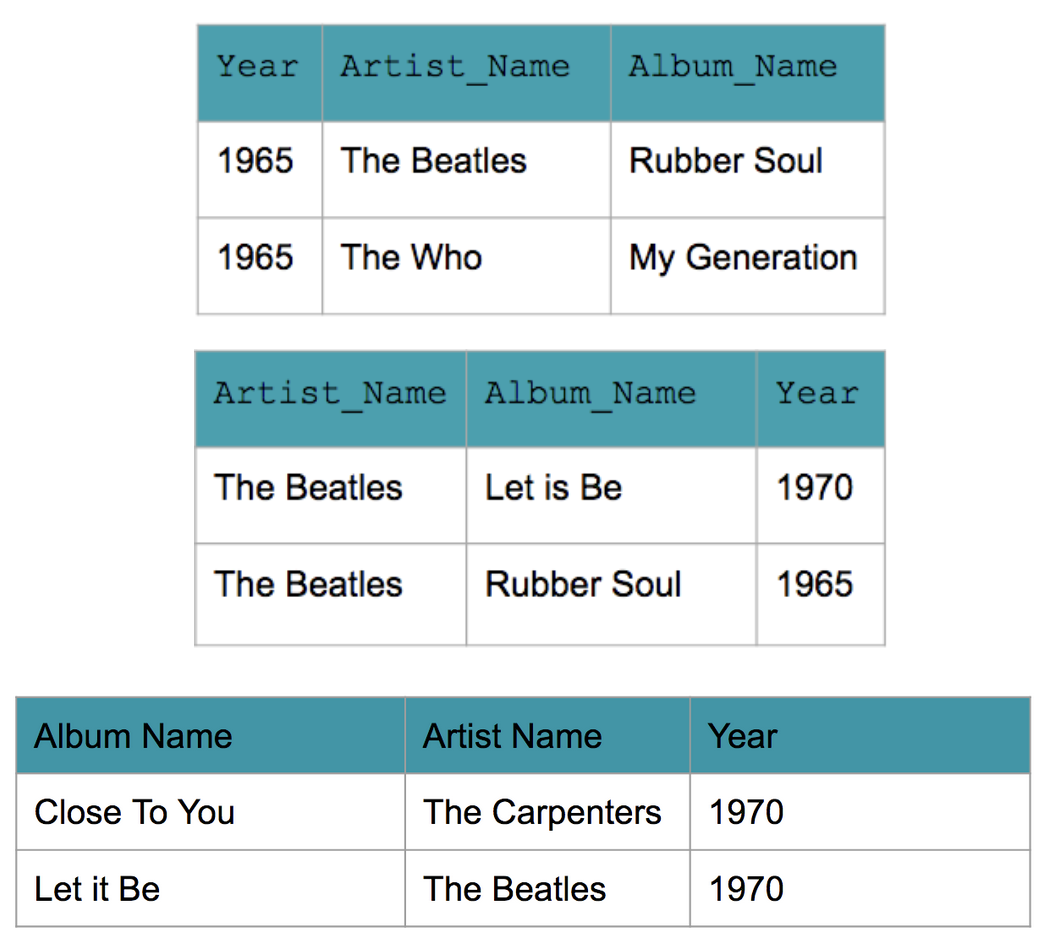

### TO-DO: Create the tables. 

In [58]:
query = "CREATE table IF NOT EXISTS  music_library"
query = query + "(year int, artist_name text, album_name text, \
                    PRIMARY KEY (year, artist_name))"
try:
    session.execute(query)
except Exception as e:
    print(e)
    
query1 = "CREATE table IF NOT EXISTS  artist_library"
query1 = query1 + "(artist_name text, year int,album_name text,  \
                    PRIMARY KEY (artist_name, year))"

try:
    session.execute(query1)
except Exception as e:
    print(e)

query2 = "CREATE table IF NOT EXISTS  album_library"
query2 = query2 +  "(album_name text, artist_name text, year int, \
                    PRIMARY KEY (album_name))"
try:
    session.execute(query2)
except Exception as e:
    print(e)

### TO-DO: Insert data into the tables

In [59]:
query = "INSERT INTO music_library (year,artist_name,album_name)"
query = query + " VALUES (%s, %s, %s)"

query1 = "INSERT INTO artist_library (artist_name,year,album_name)"
query1 = query1 + " VALUES (%s, %s, %s)"

query2 = "INSERT INTO album_library (album_name,artist_name,year)"
query2 = query2 + " VALUES (%s, %s, %s)"

try:
    session.execute(query, (1970, "The Beatles", "Let it Be"))
except Exception as e:
    print(e)
    
try:
    session.execute(query, (1965, "The Beatles", "Rubber Soul"))
except Exception as e:
    print(e)
    
try:
    session.execute(query, (1965, "The Who", "My Generation"))
except Exception as e:
    print(e)

try:
    session.execute(query, (1966, "The Monkees", "The Monkees"))
except Exception as e:
    print(e)

try:
    session.execute(query, (1970, "The Carpenters", "Close To You"))
except Exception as e:
    print(e)
    
try:
    session.execute(query1, ("The Beatles", 1970, "Let it Be"))
except Exception as e:
    print(e)
    
try:
    session.execute(query1, ("The Beatles", 1965, "Rubber Soul"))
except Exception as e:
    print(e)
    
try:
    session.execute(query1, ("The Who", 1965, "My Generation"))
except Exception as e:
    print(e)

try:
    session.execute(query1, ("The Monkees", 1966, "The Monkees"))
except Exception as e:
    print(e)

try:
    session.execute(query1, ("The Carpenters", 1970, "Close To You"))
except Exception as e:
    print(e)
    
try:
    session.execute(query2, ("Let it Be", "The Beatles", 1970))
except Exception as e:
    print(e)
    
try:
    session.execute(query2, ("Rubber Soul", "The Beatles", 1965))
except Exception as e:
    print(e)
    
try:
    session.execute(query2, ("My Generation", "The Who", 1965))
except Exception as e:
    print(e)

try:
    session.execute(query2, ("The Monkees", "The Monkees", 1966))
except Exception as e:
    print(e)

try:
    session.execute(query2, ("Close To You", "The Carpenters", 1970))
except Exception as e:
    print(e)

This might have felt unnatural to insert duplicate data into the tables. If I just normalized these tables, I wouldn't have to have extra copies! While this is true, remember there are no `JOINS` in Apache Cassandra. For the benefit of high availibity and scalabity, denormalization must be how this is done. 


### TO-DO: Validate the Data Model

In [60]:
query = "select * from music_library WHERE year = 1970"
try:
    rows = session.execute(query)
except Exception as e:
    print(e)
    
for row in rows:
    print (row.year, row.artist_name, row.album_name)

1970 The Beatles Let it Be
1970 The Carpenters Close To You


### Your output should be:
1970 The Beatles Let it Be<br>
1970 The Carpenters Close To You

### TO-DO: Validate the Data Model

**WHERE claus should filter the primary key**

In [61]:
query = "select * from artist_library WHERE ARTIST_NAME='The Beatles'"
try:
    rows = session.execute(query)
except Exception as e:
    print(e)
    
for row in rows:
    print (row.artist_name, row.album_name, row.year)

The Beatles Rubber Soul 1965
The Beatles Let it Be 1970


### Your output should be:
The Beatles Rubber Soul 1965 <br>
The Beatles Let it Be 1970 

### Validate our Data Model

`select * from album_library WHERE album_name="Close To You"`

In [64]:
query = "select * from album_library WHERE album_name='Close To You'"
try:
    rows = session.execute(query)
except Exception as e:
    print(e)
    
for row in rows:
    print (row.artist_name, row.year, row.album_name)

The Carpenters 1970 Close To You


### Your output should be:
The Carpenters 1970 Close To You

In [65]:
query = "DROP table music_library"
query1 = "DROP table artist_library"
query2 = "DROP table album_library"

try:
    session.execute(query)
except Exception as e:
    print(e)
try:
    session.execute(query1)
except Exception as e:
    print(e)

try:
    session.execute(query2)
except Exception as e:
    print(e)




### And finally close the session and cluster connection

In [66]:
session.shutdown()
cluster.shutdown()

# Primary Key
- The PRIMARY KEY is how each row can be uniquely identified and how the data is distribyted across the nodes(or severs) in our system.

If the primary key is not unique, data will be overwritten if a new value comes in with the same primary key. Error will not be thrown.

- The first element of the PRIMARY KEY is the PARTITION KEY(which will determine the distribution).
- The PRIMARY KEY is made up of either just the PARTITION KEY or with the addition of CLUSTERING COLUMNS.
- Hashing of this value results in placement on a particular node in the system

## Partition Key
- The PRIMARY KEY is made up of either just the PARTITION KEY or with the addition of CLUSTERING COLUMNS. The PARTITION KEY will determine the distribution of data across the system.
- The partition key's row value will be hashed(turned into a number) and stored on the node in the system that holds that range of values.

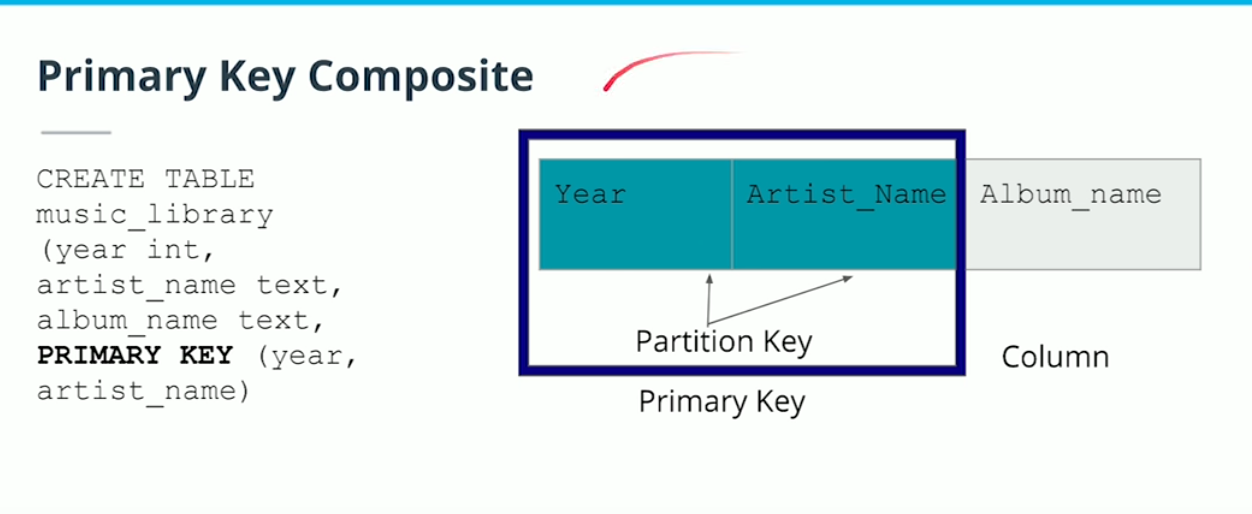

Here is the [DataStax documentation](https://docs.datastax.com/en/archived/cql/3.3/cql/cql_using/useSimplePrimaryKeyConcept.html#useSimplePrimaryKeyConcept) on Primary Keys. 

### Walk through the basics of creating a table with a good Primary Key in Apache Cassandra, inserting rows of data, and doing a simple CQL query to validate the information. 

#### Import Apache Cassandra python package

In [67]:
import cassandra

### Create a connection to the database

In [68]:
from cassandra.cluster import Cluster
try: 
    cluster = Cluster(['localhost']) #If you have a locally installed Apache Cassandra instance
    session = cluster.connect()
except Exception as e:
    print(e)

### Create a keyspace to work in 

In [69]:
try:
    session.execute("""
    CREATE KEYSPACE IF NOT EXISTS udacity 
    WITH REPLICATION = 
    { 'class' : 'SimpleStrategy', 'replication_factor' : 1 }"""
)

except Exception as e:
    print(e)

#### Connect to the Keyspace. Compare this to how we had to create a new session in PostgreSQL.  

In [70]:
try:
    session.set_keyspace('udacity')
except Exception as e:
    print(e)

### Imagine you need to create a new Music Library of albums 

### Here is the information asked of the data:
#### 1. Give every album in the music library that was created by a given artist
`select * from music_library WHERE artist_name="The Beatles"`


### Here is the collection of data
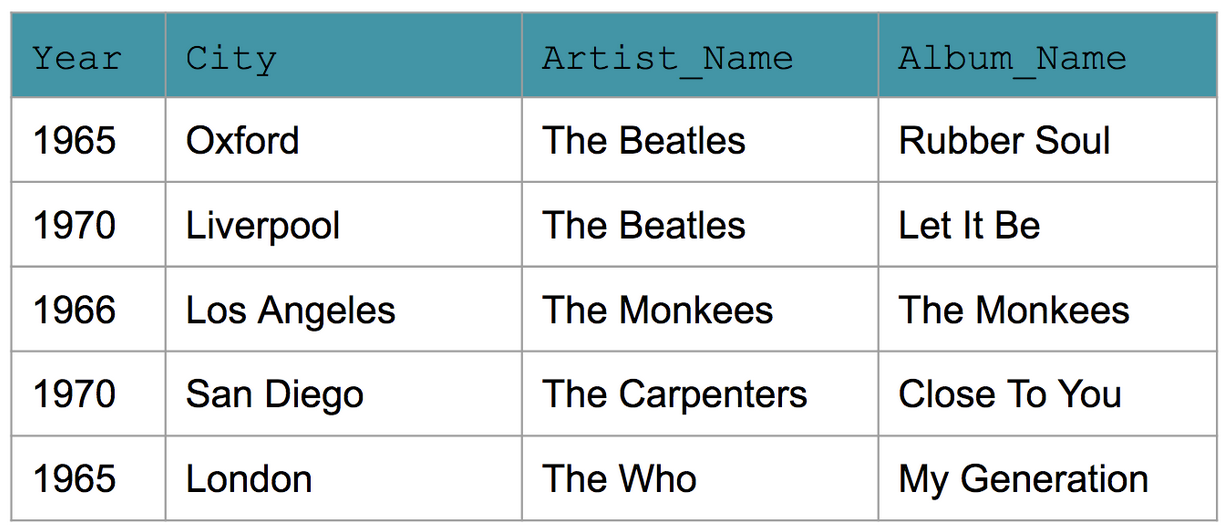

#### Practice by making the PRIMARY KEY only 1 Column (not 2 or more)

In [79]:
query = "CREATE TABLE IF NOT EXISTS music_library "
query = query + "(year int, city text, artist_name text,album_name text, PRIMARY KEY (artist_name))"
try:
    session.execute(query)
except Exception as e:
    print(e)

### Let's insert the data into the table

In [80]:
query = "INSERT INTO music_library (year, artist_name, album_name, city)"
query = query + " VALUES (%s, %s, %s, %s)"

try:
    session.execute(query, (1970, "The Beatles", "Let it Be", "Liverpool"))
except Exception as e:
    print(e)
    
try:
    session.execute(query, (1965, "The Beatles", "Rubber Soul", "Oxford"))
except Exception as e:
    print(e)
    
try:
    session.execute(query, (1965, "The Who", "My Generation", "London"))
except Exception as e:
    print(e)

try:
    session.execute(query, (1966, "The Monkees", "The Monkees", "Los Angeles"))
except Exception as e:
    print(e)

try:
    session.execute(query, (1970, "The Carpenters", "Close To You", "San Diego"))
except Exception as e:
    print(e)

### Validate the Data Model -- Does it give you two rows?

In [81]:
query = "select * from music_library WHERE artist_name='The Beatles'"
try:
    rows = session.execute(query)
except Exception as e:
    print(e)
    
for row in rows:
    print (row.year, row.artist_name, row.album_name, row.city)

1965 The Beatles Rubber Soul Oxford


### If you used just one column as your PRIMARY KEY, your output should be:
1965 The Beatles Rubber Soul Oxford


### That didn't work out as planned! Why is that?  Did you create a unique primary key?

### Try again - Create a new table with a composite key this time

In [87]:
query = "CREATE TABLE IF NOT EXISTS music_library "
query = query + "(year int, city text, artist_name text,album_name text, PRIMARY KEY (artist_name, year))"
try:
    session.execute(query)
except Exception as e:
    print(e)

In [88]:
## You can opt to change the sequence of columns to match your composite key. \ 
## Make sure to match the values in the INSERT statement

query = "INSERT INTO music_library (year, artist_name, album_name, city)"
query = query + " VALUES (%s, %s, %s, %s)"

try:
    session.execute(query, (1970, "The Beatles", "Let it Be", "Liverpool"))
except Exception as e:
    print(e)
    
try:
    session.execute(query, (1965, "The Beatles", "Rubber Soul", "Oxford"))
except Exception as e:
    print(e)
    
try:
    session.execute(query, (1965, "The Who", "My Generation", "London"))
except Exception as e:
    print(e)

try:
    session.execute(query, (1966, "The Monkees", "The Monkees", "Los Angeles"))
except Exception as e:
    print(e)

try:
    session.execute(query, (1970, "The Carpenters", "Close To You", "San Diego"))
except Exception as e:
    print(e)

### Validate the Data Model -- Did it work?

In [89]:
query = "select * from music_library WHERE artist_name='The Beatles'"
try:
    rows = session.execute(query)
except Exception as e:
    print(e)
    
for row in rows:
    print (row.year, row.artist_name, row.album_name, row.city)

1965 The Beatles Rubber Soul Oxford
1970 The Beatles Let it Be Liverpool


### Drop the tables

In [86]:
query = "DROP table music_library"
try:
    session.execute(query)
except Exception as e:
    print(e)


In [90]:
session.shutdown()
cluster.shutdown()

## Clustering Columns

- The clustering column will sort the data in sorted **ascending** order, e.g., alphabetical order. **Note: this is a mistake in the video, which says descending order.**
- More than one clustering column can be added (or none!)
- From there the clustering columns will sort in order of how they were added to the primary key
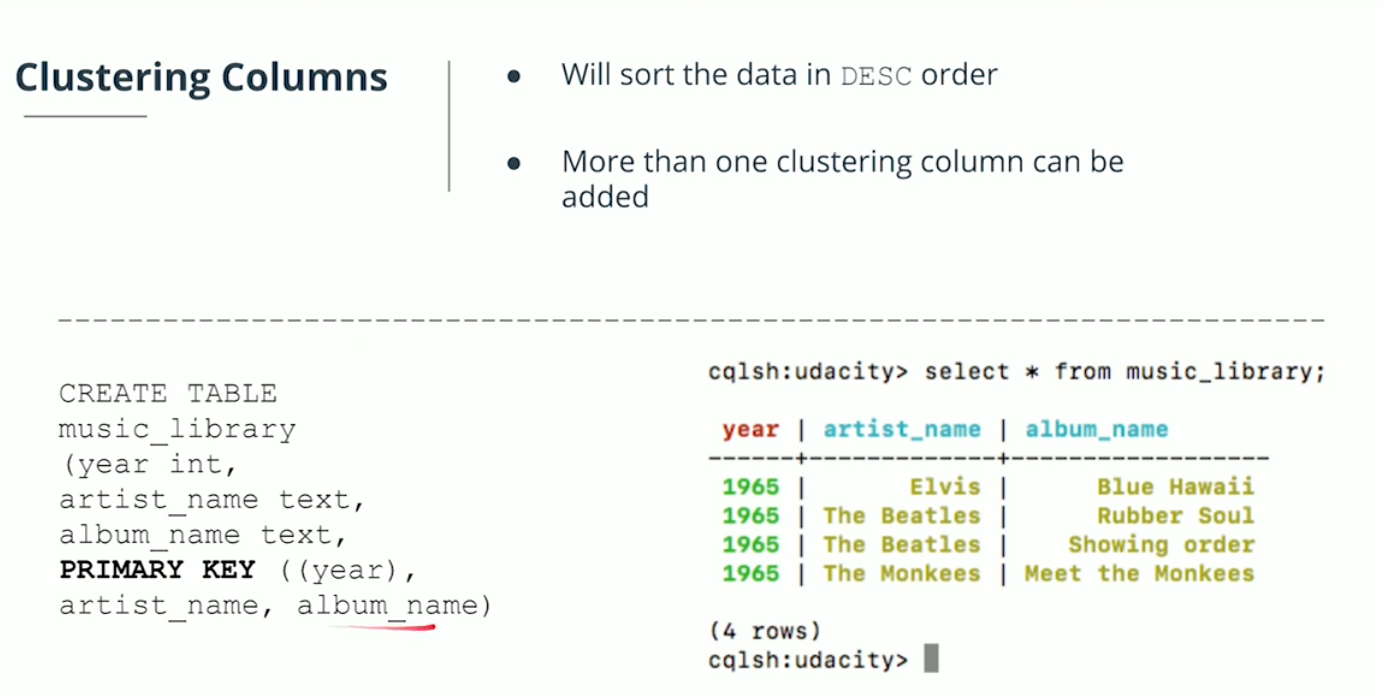

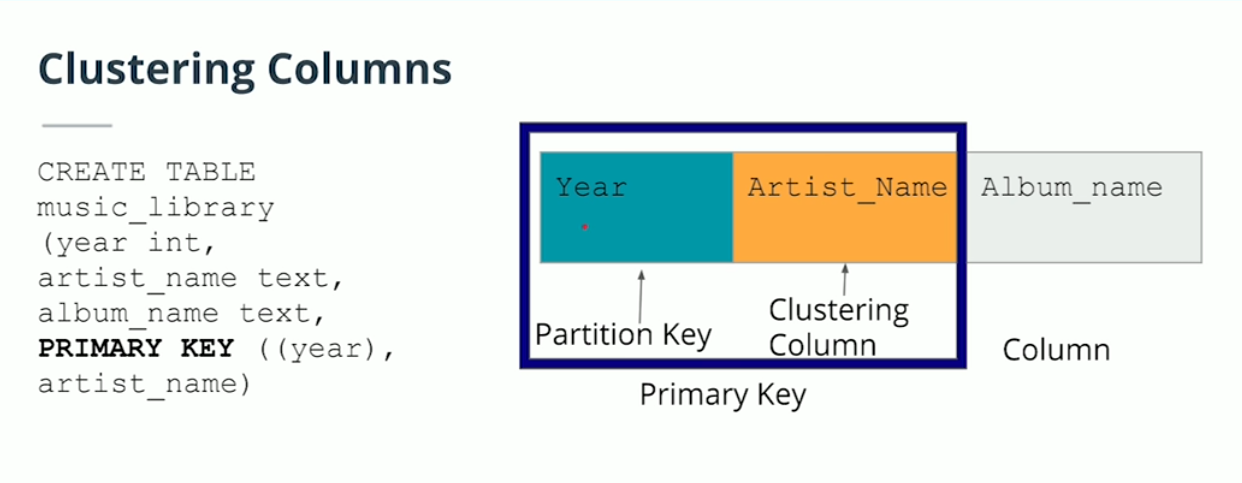

## Commonly Asked Questions:

**How many clustering columns can we add?**
You can use as many clustering columns as you would like. You cannot use the clustering columns out of order in the SELECT statement. You may choose to omit using a clustering column in your SELECT statement. That's OK. Just remember to use them in order when you are using the SELECT statement.
### Additional Resources:

- Here is the [DataStax documentation](https://docs.datastax.com/en/archived/cql/3.3/cql/cql_using/useCompoundPrimaryKeyConcept.html) on Composite Partition Keys.
- This [Stackoverflow](https://stackoverflow.com/questions/24949676/difference-between-partition-key-composite-key-and-clustering-key-in-cassandra) page provides a nice description of the difference between Partition Keys and Clustering Keys.


Please note that the both partition and clustering key can be made by more columns, here's how:
```sql
 create table stackoverflow_multiple (
      k_part_one text,
      k_part_two int,
      k_clust_one text,
      k_clust_two int,
      k_clust_three uuid,
      data text,
      PRIMARY KEY((k_part_one, k_part_two), k_clust_one, k_clust_two, k_clust_three)      
  );
```

    Behind these names ...

    - The Partition Key is responsible for data distribution across your nodes.
    - The Clustering Key is responsible for data sorting within the partition.
    - The Primary Key is equivalent to the Partition Key in a single-field-key table (i.e. Simple).
    - The Composite/Compound Key is just any multiple-column key


### Walk through the basics of creating a table with a good Primary Key and Clustering Columns in Apache Cassandra, inserting rows of data, and doing a simple CQL query to validate the information. 

In [10]:
import cassandra

from cassandra.cluster import Cluster
try: 
    cluster = Cluster(['localhost']) #If you have a locally installed Apache Cassandra instance
    session = cluster.connect()
except Exception as e:
    print(e)

### Create a keyspace to work in 

In [11]:
try:
    session.execute("""
    CREATE KEYSPACE IF NOT EXISTS udacity 
    WITH REPLICATION = 
    { 'class' : 'SimpleStrategy', 'replication_factor' : 1 }"""
)

except Exception as e:
    print(e)

#### Connect to the Keyspace. Compare this to how we had to create a new session in PostgreSQL.  

In [12]:
try:
    session.set_keyspace('udacity')
except Exception as e:
    print(e)

### Imagine we would like to start creating a new Music Library of albums. 

### We want to ask 1 question of our data:
### 1. Give me all the information from the music library about a given album
`select * from album_library WHERE album_name="Close To You"`

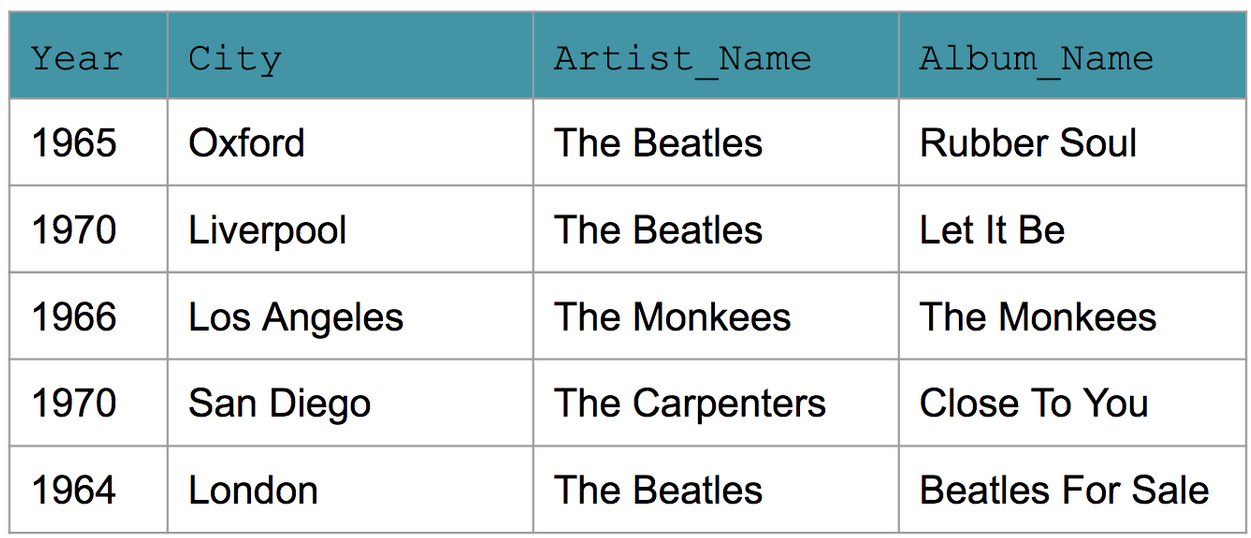

### How should we model this data? What should be our Primary Key and Partition Key? 

In [13]:
query = "CREATE TABLE IF NOT EXISTS album_library "
query = query + "(album_name text,artist_name text,year int,  city text, PRIMARY KEY (album_name, artist_name))"
try:
    session.execute(query)
except Exception as e:
    print(e)

### Insert data into the table

In [14]:
## You can opt to change the sequence of columns to match your composite key. \ 
## If you do, make sure to match the values in the INSERT statement

query = "INSERT INTO album_library (year,artist_name,album_name,city )"
query = query + " VALUES (%s, %s, %s, %s)"

try:
    session.execute(query, (1970, "The Beatles", "Let it Be", "Liverpool"))
except Exception as e:
    print(e)
    
try:
    session.execute(query, (1965, "The Beatles", "Rubber Soul", "Oxford"))
except Exception as e:
    print(e)
    
try:
    session.execute(query, (1964, "The Beatles", "Beatles For Sale", "London"))
except Exception as e:
    print(e)

try:
    session.execute(query, (1966, "The Monkees", "The Monkees", "Los Angeles"))
except Exception as e:
    print(e)

try:
    session.execute(query, (1970, "The Carpenters", "Close To You", "San Diego"))
except Exception as e:
    print(e)

### Validate the Data Model -- Did it work? 
`select * from album_library WHERE album_name="Close To You"`

In [15]:
query = "select * from album_library WHERE album_name='Close To You'"
try:
    rows = session.execute(query)
except Exception as e:
    print(e)
    
for row in rows:
    print (row.artist_name, row.album_name, row.city, row.year)

The Carpenters Close To You San Diego 1970


### Success it worked! We created a unique Primary key that evenly distributed our data, with clustering columns

### For the sake of the demo, drop the table

In [9]:
query = "drop table music_library"
try:
    rows = session.execute(query)
except Exception as e:
    print(e)


### Close the session and cluster connection

In [ ]:
session.shutdown()
cluster.shutdown()

## WHERE Clause
- Data modeling in Apache Cassandra is query focused, and that focus needs to be on the WHERE clause
- The PARTITION KEY must be included in your query and any clustering columns canbu used in the order they appear in your PRIMARY KEY
- Failure to include a WHERE clasue will result in an error

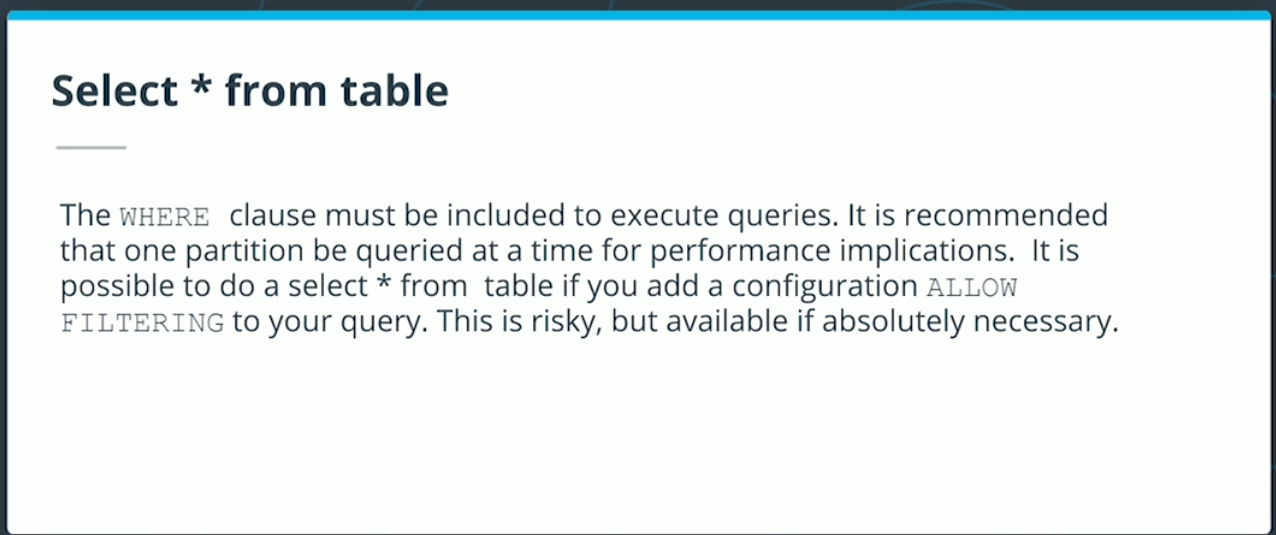


### Additional Resource

AVOID using "ALLOW FILTERING": Here is a [reference in DataStax](https://www.datastax.com/blog/2014/12/allow-filtering-explained) that explains ALLOW FILTERING and why you should not use it.

### Commonly Asked Questions:

**Why do we need to use a `WHERE` statement since we are not concerned about analytics? Is it only for debugging purposes?**

The `WHERE` statement is allowing us to do the fast reads. With Apache Cassandra, we are talking about big data -- think terabytes of data -- so we are making it fast for read purposes. Data is spread across all the nodes. By using the `WHERE` statement, we know which node to go to, from which node to get that data and serve it back. For example, imagine we have 10 years of data on 10 nodes or servers. So 1 year's data is on a separate node. By using the `WHERE year = 1` statement we know which node to visit fast to pull the data from.


### In this exercise we are going to walk through the basics of using the WHERE clause in Apache Cassandra.

In [43]:
import cassandra

from cassandra.cluster import Cluster
try: 
    cluster = Cluster(['localhost']) #If you have a locally installed Apache Cassandra instance
    session = cluster.connect()
except Exception as e:
    print(e)

### Let's create a keyspace to do our work in 

In [44]:
try:
    session.execute("""
    CREATE KEYSPACE IF NOT EXISTS udacity 
    WITH REPLICATION = 
    { 'class' : 'SimpleStrategy', 'replication_factor' : 1 }"""
)

except Exception as e:
    print(e)

#### Connect to our Keyspace. Compare this to how we had to create a new session in PostgreSQL.  

In [45]:
try:
    session.set_keyspace('udacity')
except Exception as e:
    print(e)

### Let's imagine we would like to start creating a new Music Library of albums. 
### We want to ask 4 question of our data
#### 1. Give me every album in my music library that was released in a 1965 year
#### 2. Give me the album that is in my music library that was released in 1965 by "The Beatles"
#### 3. Give me all the albums released in a given year that was made in London 
#### 4. Give me the city that the album "Rubber Soul" was recorded

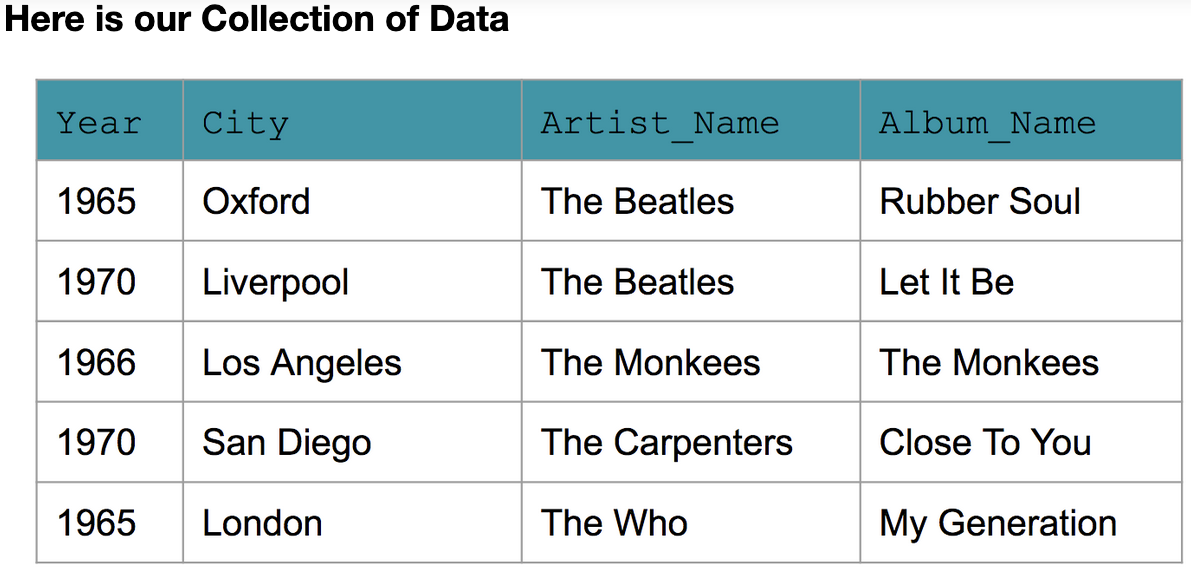

### How should we model this data? What should be our Primary Key and Partition Key? Since our data is looking for the YEAR let's start with that. From there we will add clustering columns on Artist Name and Album Name.

In [46]:
query = "CREATE TABLE IF NOT EXISTS music_library "
query = query + "(year int, artist_name text, album_name text, city text, PRIMARY KEY ((year, artist_name), album_name))"
try:
    session.execute(query)
except Exception as e:
    print(e)

### Let's insert our data into of table

In [47]:
query = "INSERT INTO music_library (year, artist_name, album_name, city)"
query = query + " VALUES (%s, %s, %s, %s)"

try:
    session.execute(query, (1970, "The Beatles", "Let it Be", "Liverpool"))
except Exception as e:
    print(e)
    
try:
    session.execute(query, (1965, "The Beatles", "Rubber Soul", "Oxford"))
except Exception as e:
    print(e)
    
try:
    session.execute(query, (1965, "The Who", "My Generation", "London"))
except Exception as e:
    print(e)

try:
    session.execute(query, (1966, "The Monkees", "The Monkees", "Los Angeles"))
except Exception as e:
    print(e)

try:
    session.execute(query, (1970, "The Carpenters", "Close To You", "San Diego"))
except Exception as e:
    print(e)

### Let's Validate our Data Model with our 4 queries.

Query 1: Give me every album in my music library that was released in a 1965 year

In [48]:
query = "SELECT * FROM music_library WHERE year = 1965"
try:
    rows = session.execute(query)
except Exception as e:
    print(e)
    
for row in rows:
    print (row.year, row.artist_name, row.album_name, row.city)

1965 The Beatles Rubber Soul Oxford
1965 The Who My Generation London


Let's try the 2nd query.
 Query 2: Give me the album that is in my music library that was released in 1965 by "The Beatles

In [49]:
query = "SELECT * FROM music_library WHERE year = 1965 AND artist_name = 'The Beatles'"
try:
    rows = session.execute(query)
except Exception as e:
    print(e)
    
for row in rows:
    print (row.year, row.artist_name, row.album_name, row.city)

1965 The Beatles Rubber Soul Oxford


### Let's try the 3rd query.
Query 3: Give me all the albums released in a given year that was made in London

In [50]:
query = "SELECT * FROM music_library WHERE year = 1965 AND album_name = 'Let it Be'"
try:
    rows = session.execute(query)
except Exception as e:
    print(e)
    
for row in rows:
    print (row.year, row.artist_name, row.album_name, row.city)

Error from server: code=2200 [Invalid query] message="PRIMARY KEY column "album_name" cannot be restricted as preceding column "artist_name" is not restricted"


In [51]:
query = "SELECT * FROM music_library WHERE city = 'Oxford'"
try:
    rows = session.execute(query)
except Exception as e:
    print(e)
    
for row in rows:
    print (row.year, row.artist_name, row.album_name, row.city)

Error from server: code=2200 [Invalid query] message="Cannot execute this query as it might involve data filtering and thus may have unpredictable performance. If you want to execute this query despite the performance unpredictability, use ALLOW FILTERING"


### Did you get an error? You can not try to access a column or a clustering column if you have not used the other defined clustering column. Let's see if we can try it a different way. 
Try Query 4: Give me the city that the album "Rubber Soul" was recorded¶



In [52]:
query = "SELECT * FROM music_library WHERE year = 1965 AND artist_name = 'The Beatles' AND album_name = 'Rubber Soul' "

try:
    rows = session.execute(query)
except Exception as e:
    print(e)
    
for row in rows:
    print (row.city)

Oxford


### And Finally close the session and cluster connection

In [53]:
session.shutdown()
cluster.shutdown()

## What we covered in this lesson:

- Basics of Distributed Database Design
- Must know your queries and model the tables to your queries
- Importance of Denormalization
- Apache Cassandra is a popular NoSQL database
- CQL and some key differences with SQL
- Primary Key, Partition Key, and Clustering Column
- The WHERE clause

